#### Problem statement!

The attached data file contains temperature data for 45 freezers spread across 4 sites for 15 days from 7th May to 22nd May 2019, sampled at 1 minute. Analyse the data and draw as many inferences as you can. Major focus of the analysis is on the lines of - 

1. The data has many missing values, try different methods of filling these missing values, documenting clearly any assumptions taken while doing the same.
2. Find the operational temperature range of each freezer.
3. Find the daily average of door open duration per freezer.
4. Classify these freezers based on their operational health.

Other than this, it is an open ended problem, so feel free to add insights basis your own experience.

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pandas_profiling

import matplotlib.pyplot as plt

plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Loading Dataset

In [5]:
data = pd.read_csv('D:\Data\Download_\Downloads_\zenatix\Temperature_Data.csv',)
data.head()

0  Site-1 > Freezer-1  Site-1 > Freezer-2  \
0  2019-05-07 00:00:00                3.81              -18.37   
1  2019-05-07 00:01:00                3.68              -17.56   
2  2019-05-07 00:02:00                3.62              -16.87   
3  2019-05-07 00:03:00                3.56              -16.18   
4  2019-05-07 00:04:00                3.43              -15.43   

   Site-1 > Freezer-3  Site-1 > Freezer-4  Site-1 > Freezer-5  \
0                2.06               21.31                3.25   
1                2.25               21.25                2.87   
2                2.56               21.31                2.81   
3                2.87               21.31                3.00   
4                3.25               21.18                3.31   

   Site-1 > Freezer-6  Site-1 > Freezer-7  Site-1 > Freezer-8  \
0                8.00                8.56                9.81   
1                1.06                8.43                9.43   
2               -2.81                9.50                9.31   
3               -5.50                9.12                9.18   
4               -7.56                8.50               10.18   

   Site-1 > Freezer-9  ...  Site-3 > Freezer-16  Site-4 > Freezer-1  \
0                6.06  ...                20.93               10.06   
1                6.12  ...                20.93                9.93   
2                6.12  ...                21.00               10.06   
3                6.06  ...                20.93               10.06   
4                6.12  ...                20.93               10.00   

   Site-4 > Freezer-2  Site-4 > Freezer-3  Site-4 > Freezer-4  \
0                6.18               -2.50               10.56   
1                5.93               -2.81               10.62   
2                6.18               -3.06               10.81   
3                6.56               -3.18               10.93   
4                6.93               -3.31               11.00   

   Site-4 > Freezer-5  Site-4 > Freezer-6  Site-4 > Freezer-7  \
0               17.43                4.56                5.12   
1               17.75                4.93                5.12   
2               17.93                5.25                6.12   
3               18.06                5.56                7.56   
4               17.81                5.75                8.12   

   Site-4 > Freezer-8  Site-4 > Freezer-9  
0                2.75                8.75  
1                3.56                8.50  
2                6.43                8.25  
3                8.81                8.00  
4                7.56                8.06  

[5 rows x 46 columns]

#### Renaming 0th column as Time

In [41]:
data.rename(columns={'0':'Time'},inplace=True)

In [42]:
data.head(2)

Time  Site-1 > Freezer-1  Site-1 > Freezer-2  \
0  2019-05-07 00:00:00                3.81              -18.37   
1  2019-05-07 00:01:00                3.68              -17.56   

   Site-1 > Freezer-3  Site-1 > Freezer-4  Site-1 > Freezer-5  \
0                2.06               21.31                3.25   
1                2.25               21.25                2.87   

   Site-1 > Freezer-6  Site-1 > Freezer-7  Site-1 > Freezer-8  \
0                8.00                8.56                9.81   
1                1.06                8.43                9.43   

   Site-1 > Freezer-9         ...          Site-3 > Freezer-16  \
0                6.06         ...                        20.93   
1                6.12         ...                        20.93   

   Site-4 > Freezer-1  Site-4 > Freezer-2  Site-4 > Freezer-3  \
0               10.06                6.18               -2.50   
1                9.93                5.93               -2.81   

   Site-4 > Freezer-4  Site-4 > Freezer-5  Site-4 > Freezer-6  \
0               10.56               17.43                4.56   
1               10.62               17.75                4.93   

   Site-4 > Freezer-7  Site-4 > Freezer-8  Site-4 > Freezer-9  
0                5.12                2.75                8.75  
1                5.12                3.56                8.50  

[2 rows x 46 columns]

#### This gives a detailed analysis for each freezer temp distribution

In [1062]:
#pandas_profiling.ProfileReport(data)

#### Descriptive data - Desc Data

- **`|CV|`** measures the coefficient of variation for each freezer

- A CV of 0.5 above shows high variability in the temperature distribution

In [15]:
desc = data.describe().T


### CV -  coefficient of variation
desc['|CV|']  = np.absolute(desc['std']/desc['mean'])

desc = desc.sort_values(by = '|CV|',ascending= False)
desc.head()

count       mean        std    min    25%    50%  \
Site-3 > Freezer-14  21597.0   5.968100   5.602361   1.18   2.25   3.25   
Site-3 > Freezer-13  22199.0 -11.760311  11.011848 -27.18 -21.62 -17.00   
Site-3 > Freezer-12  21219.0 -13.620149  11.366394 -24.62 -20.93 -18.87   
Site-3 > Freezer-11  22914.0 -13.275319   9.777138 -23.62 -19.62 -17.75   
Site-1 > Freezer-3   22862.0   4.122965   2.897975   1.62   2.56   3.37   

                       75%    max      |CV|  
Site-3 > Freezer-14   8.68  22.93  0.938718  
Site-3 > Freezer-13  -0.62  17.00  0.936357  
Site-3 > Freezer-12 -12.43  31.31  0.834528  
Site-3 > Freezer-11 -12.56  14.25  0.736490  
Site-1 > Freezer-3    4.25  26.56  0.702886

#### Adding the %share of Null values for each feature

In [16]:
nulls = data.isnull().sum().sort_values(ascending = False).to_frame()*100/len(data)
desc  = desc.merge(nulls,left_index=True,right_index=True)

In [23]:
desc.rename(columns={0:'%zeroes'},inplace=True)
desc.head()

count       mean        std    min    25%    50%  \
Site-3 > Freezer-14  21597.0   5.968100   5.602361   1.18   2.25   3.25   
Site-3 > Freezer-13  22199.0 -11.760311  11.011848 -27.18 -21.62 -17.00   
Site-3 > Freezer-12  21219.0 -13.620149  11.366394 -24.62 -20.93 -18.87   
Site-3 > Freezer-11  22914.0 -13.275319   9.777138 -23.62 -19.62 -17.75   
Site-1 > Freezer-3   22862.0   4.122965   2.897975   1.62   2.56   3.37   

                       75%    max      |CV|   %zeroes  
Site-3 > Freezer-14   8.68  22.93  0.938718  6.263021  
Site-3 > Freezer-13  -0.62  17.00  0.936357  3.650174  
Site-3 > Freezer-12 -12.43  31.31  0.834528  7.903646  
Site-3 > Freezer-11 -12.56  14.25  0.736490  0.546875  
Site-1 > Freezer-3    4.25  26.56  0.702886  0.772569

#### Adding standard deviation, skew , kurtosis value for each freezer temp distribution


- **`Kurtosis`** values having magnitude higher than 1 shows that the distribution has a significant no of points in its tail. This **might** result in presence of outliers in the data

- **`Skew`** values greater than +1 shows presence of majority of distribution points at lower temp(which should be the case for a freezer) & values less than -1 shows presence of majority of data points at higher temp range(which **might** be because of poor freezer performance)

In [24]:
desc_var = pd.DataFrame(list(zip(data.columns,data.skew(),data.kurtosis())),columns= ['cols','skew','kurtosis'])
desc_var.set_index('cols',inplace=True)

In [25]:
desc  = desc.merge(desc_var,left_index=True,right_index=True)

In [26]:
desc.head()

count       mean        std    min    25%    50%  \
Site-3 > Freezer-14  21597.0   5.968100   5.602361   1.18   2.25   3.25   
Site-3 > Freezer-13  22199.0 -11.760311  11.011848 -27.18 -21.62 -17.00   
Site-3 > Freezer-12  21219.0 -13.620149  11.366394 -24.62 -20.93 -18.87   
Site-3 > Freezer-11  22914.0 -13.275319   9.777138 -23.62 -19.62 -17.75   
Site-1 > Freezer-3   22862.0   4.122965   2.897975   1.62   2.56   3.37   

                       75%    max      |CV|   %zeroes      skew  kurtosis  
Site-3 > Freezer-14   8.68  22.93  0.938718  6.263021  1.277760  0.871057  
Site-3 > Freezer-13  -0.62  17.00  0.936357  3.650174  1.333387  0.374042  
Site-3 > Freezer-12 -12.43  31.31  0.834528  7.903646  0.401796 -1.416123  
Site-3 > Freezer-11 -12.56  14.25  0.736490  0.546875  1.506853  1.035281  
Site-1 > Freezer-3    4.25  26.56  0.702886  0.772569  0.834379  0.309809

- Only 1 freezer with a `negitive skew`

In [1069]:
desc[desc['skew'] < 0]

count       mean       std    min    25%    50%    75%  \
Site-3 > Freezer-2  21595.0  15.871211  1.264865  13.31  14.75  15.87  16.93   

                      max      |CV|   %zeroes      skew  kurtosis  
Site-3 > Freezer-2  21.75  0.079696  6.271701 -0.324153 -0.071028

## EDA - Exploratory Data Analysis

#### Share of rows having Null values in any of column


- Approx `60% rows` have `null values` so removing rows with null values is not an option!
- Also by removing rows, we dont want to break the cyclicity of the temp data distribtion

In [30]:
print('Total Datapoints:',data.shape[0])
print('Rows with null values:',data.isnull().any(axis = 1).sum())

Total Datapoints: 23040
Rows with null values: 13642


#### Measure of spread - Plotting box plots


- A lot of variables have outlier values spread across the distribution which shows large variability of temp. distribution 

- Box plots helps us analyse the presence of outliers 

- ------------------------------

- outliers plotted here(dots) are not in bound of:
    - The values not lying in the range `Q1 – 1.5×IQR` and `Q3 + 1.5×IQR` are considered outliers
    -  IQR = Q3 - Q1
    - Q : Quartiles

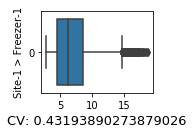

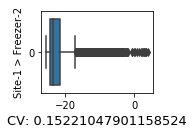

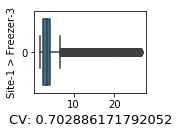

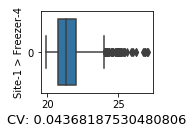

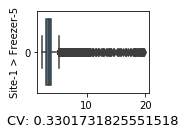

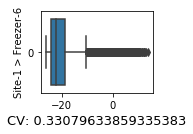

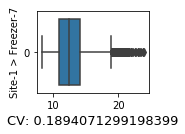

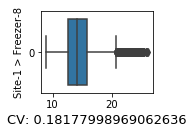

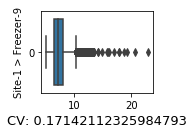

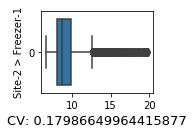

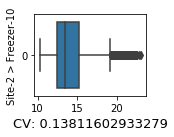

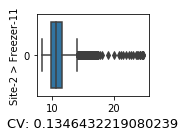

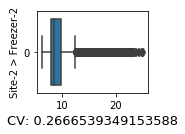

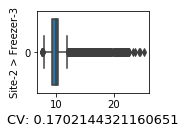

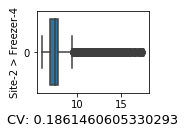

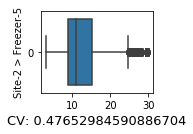

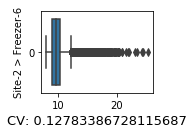

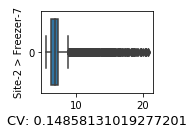

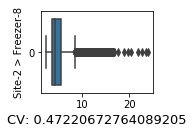

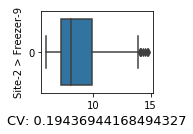

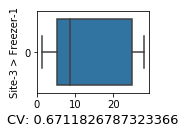

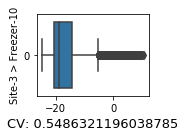

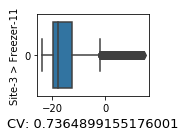

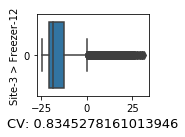

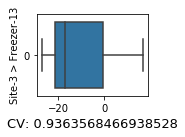

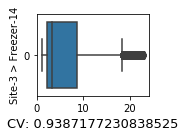

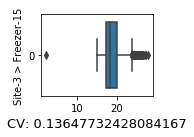

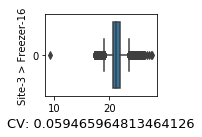

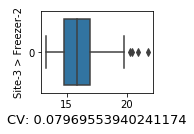

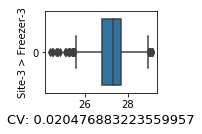

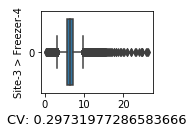

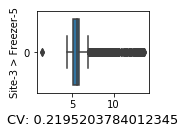

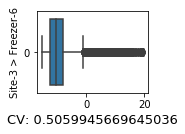

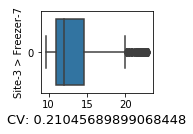

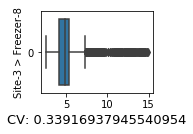

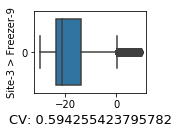

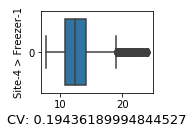

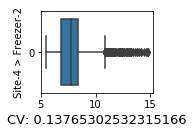

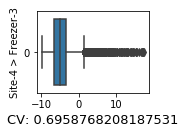

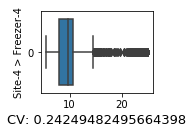

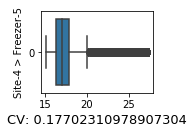

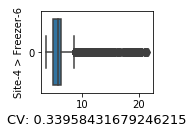

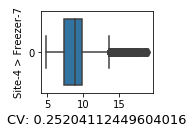

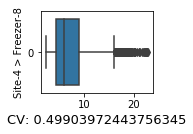

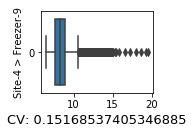

In [31]:
for x in data.columns.difference(['Time']):
    plt.figure(figsize=(2,1.5))
    plt.ylabel(x)
    plt.xlabel('CV: {0}'.format(np.absolute(data[x].std()/data[x].mean())),fontsize = 13)
    sns.boxplot(data = data[x],orient= 'h')
    plt.show()

#### Measure of spread - Plotting Histogram(frequency plot) to analyse the skew & kurtosis of the distribution

-  Perfectly normal distribution has a **0 Skew** & **0 Kurtoisis(normalized)**


- It can be seen from the below visualization that for most of the freezers the distribution(Temperature) is positively skewed, that means major share of values lie in lower values of temperature   - This Indicates an overall good cooling capacity

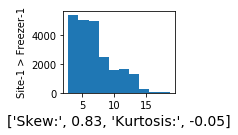

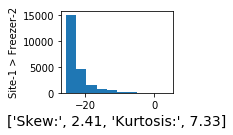

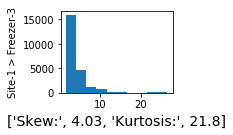

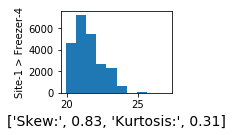

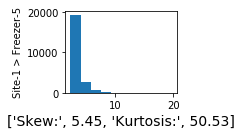

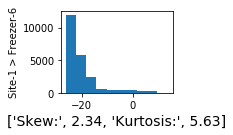

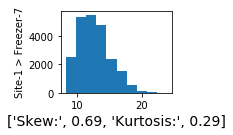

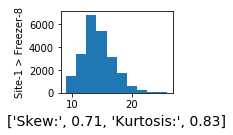

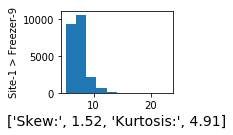

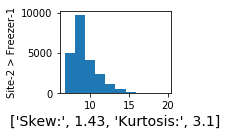

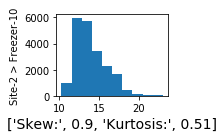

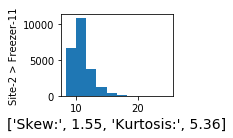

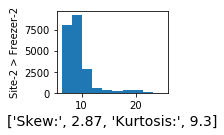

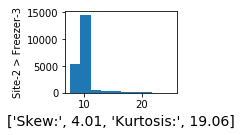

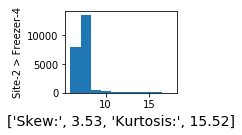

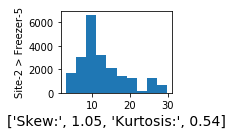

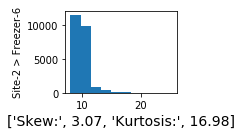

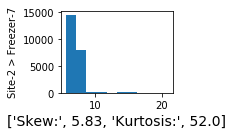

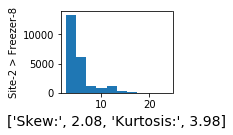

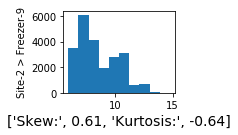

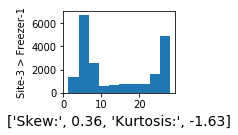

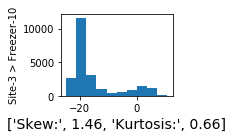

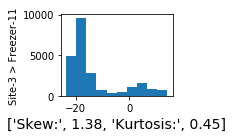

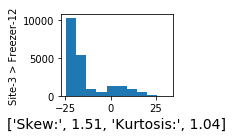

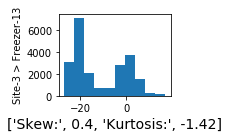

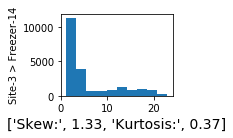

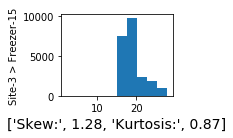

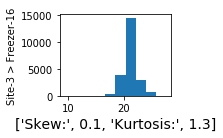

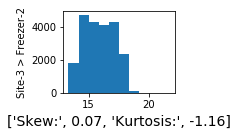

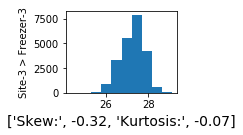

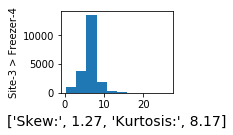

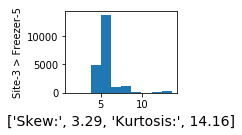

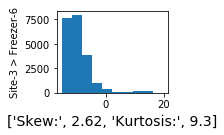

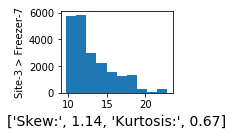

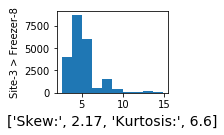

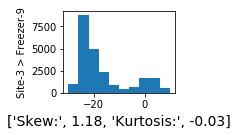

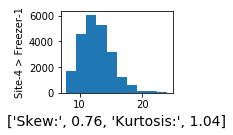

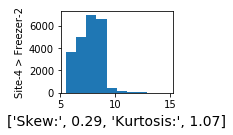

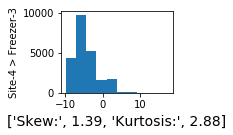

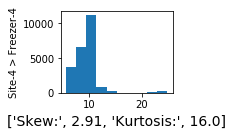

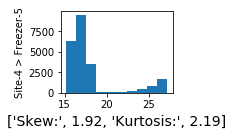

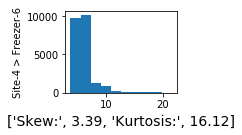

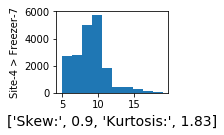

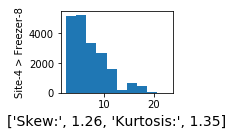

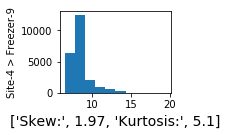

In [37]:
#plt.set_ylabel("Median Population", fontname="Arial", fontsize=12)

for x in data.columns.difference(['Time']):
    plt.figure(figsize=(2,1.5))
    plt.ylabel(x)
    plt.xlabel(['Skew:',np.round(data[x].skew(),2),'Kurtosis:',np.round(data[x].kurtosis(),2)],fontsize=14)
    plt.hist(data[data[x].notnull()][x],bins = 10)
    plt.show()

#### Analysing the trend of data

- It can be seen that for a majority of freezers the temperature is showing cycling patterns of rise & fall

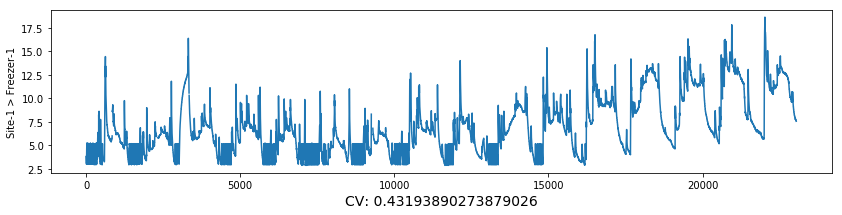

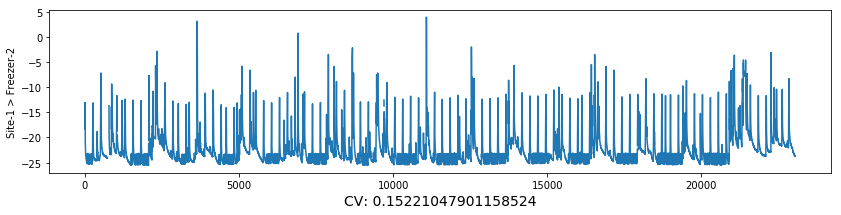

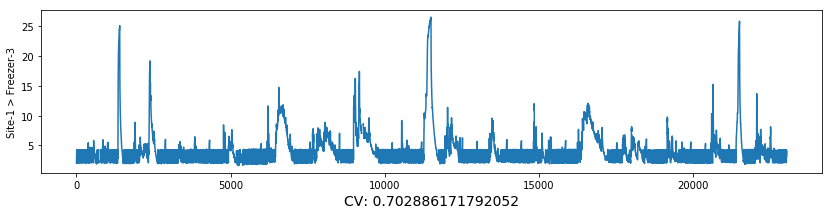

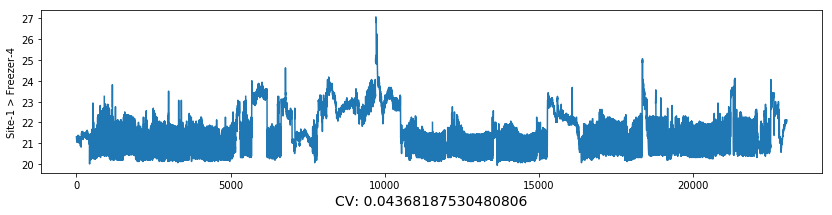

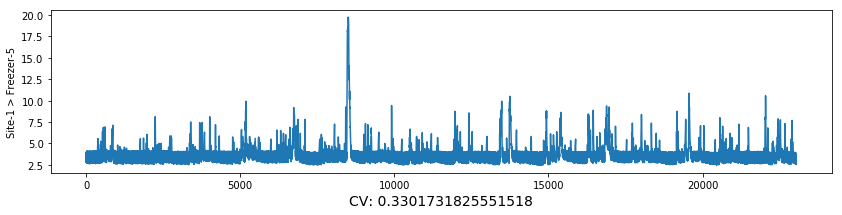

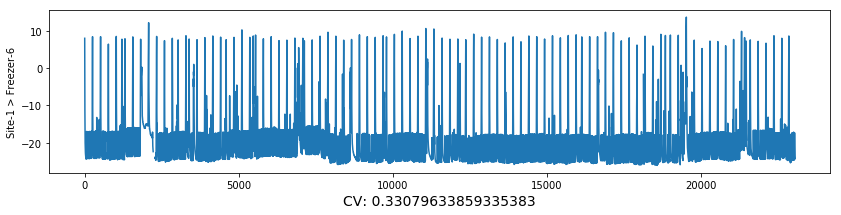

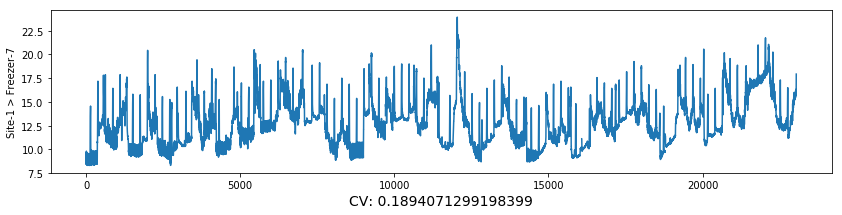

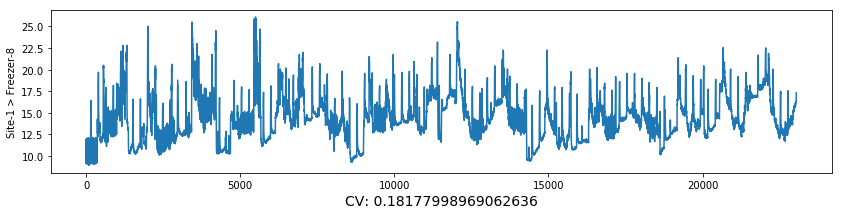

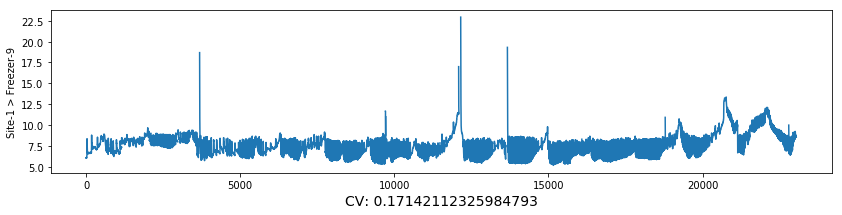

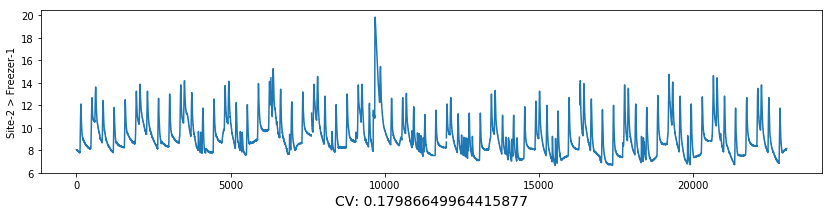

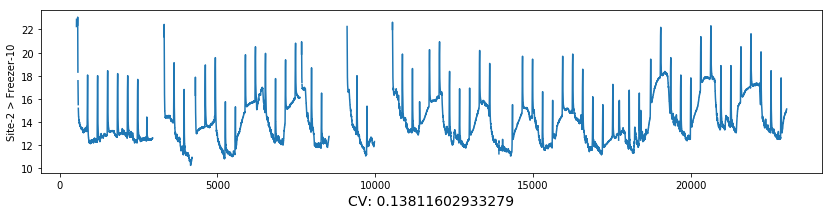

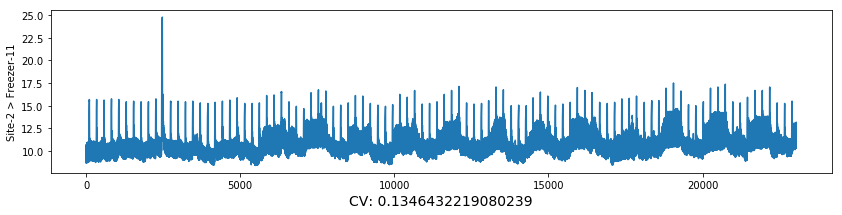

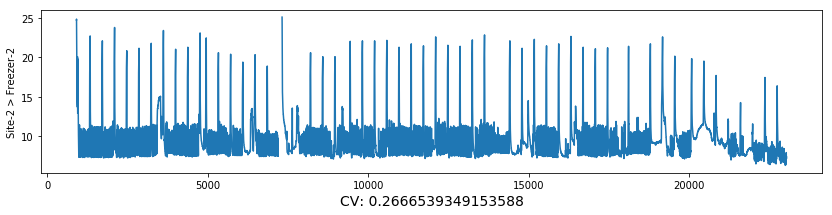

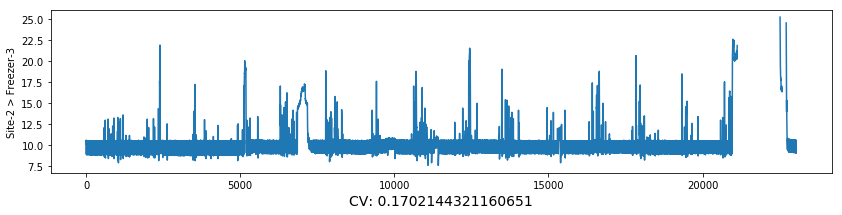

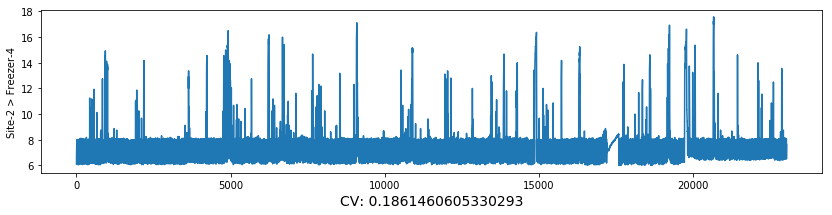

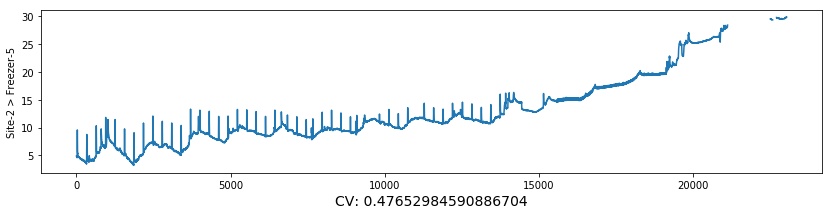

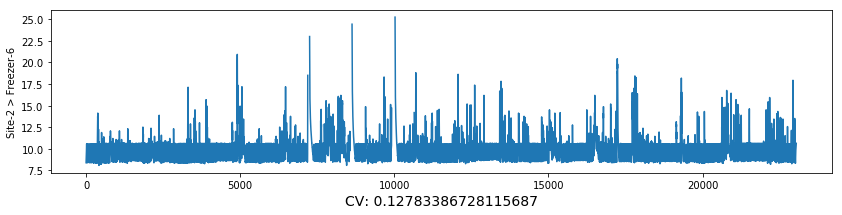

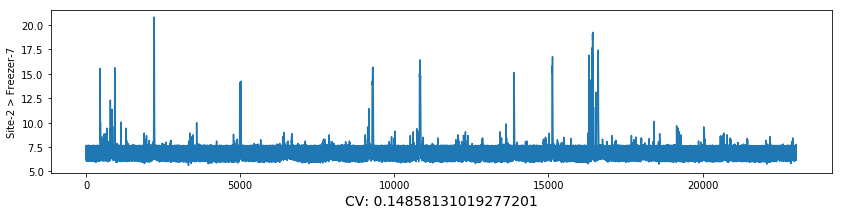

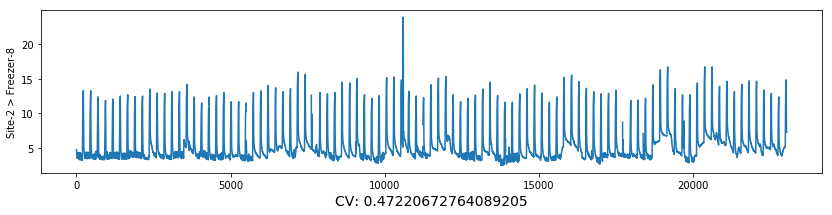

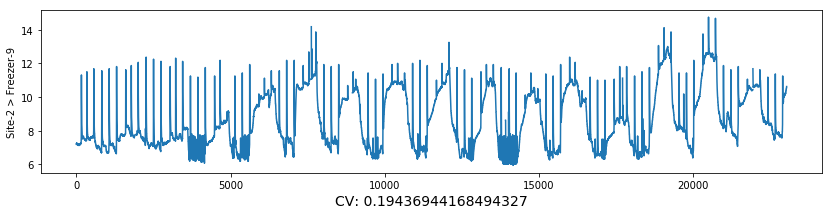

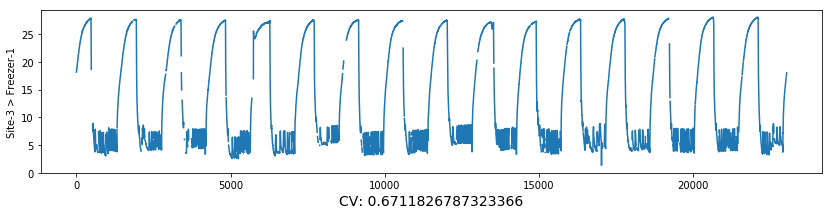

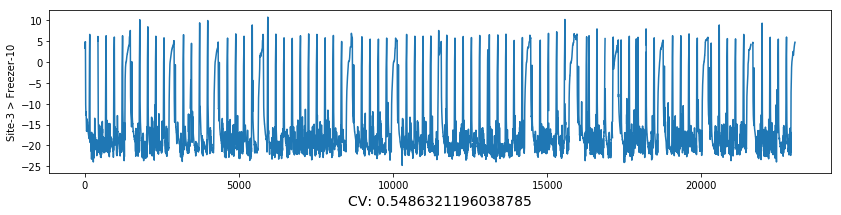

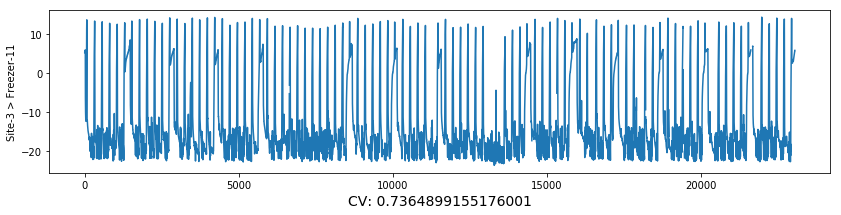

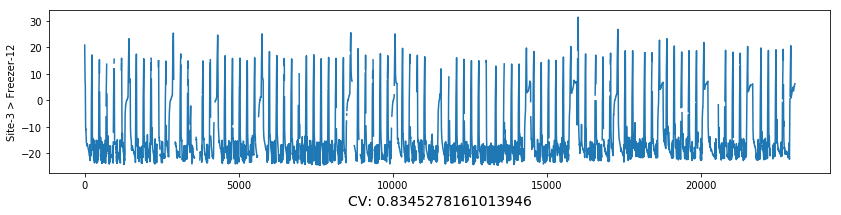

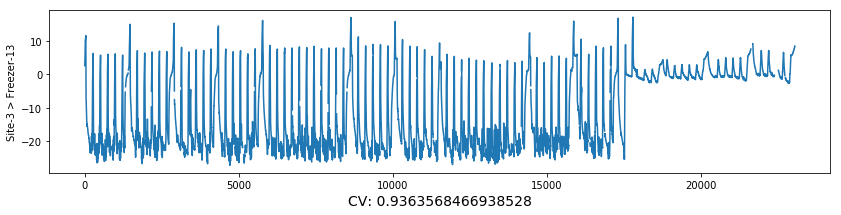

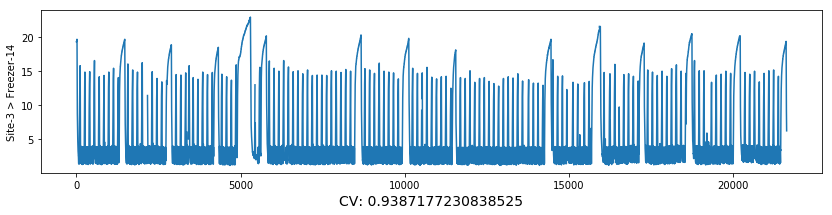

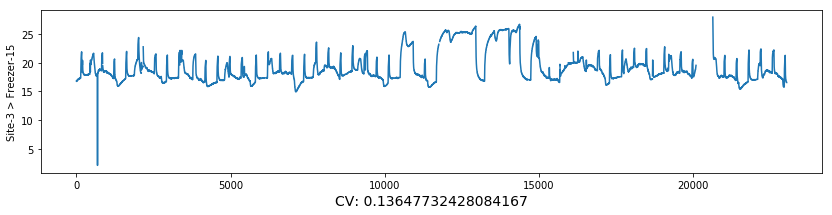

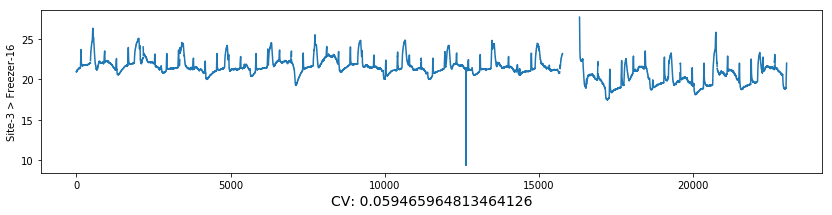

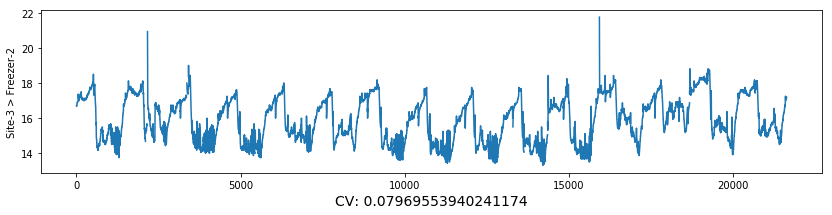

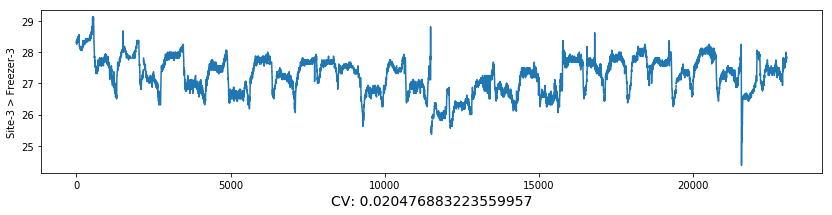

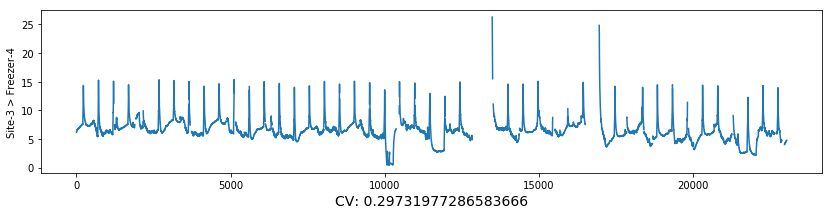

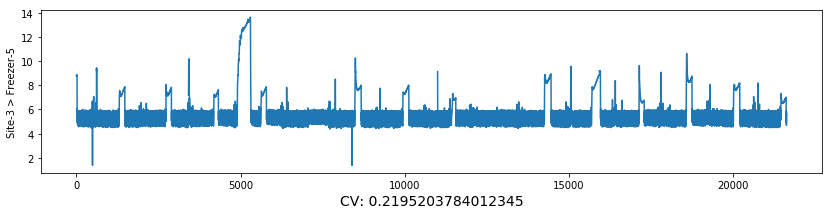

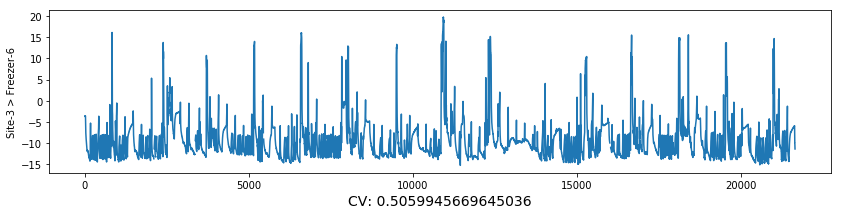

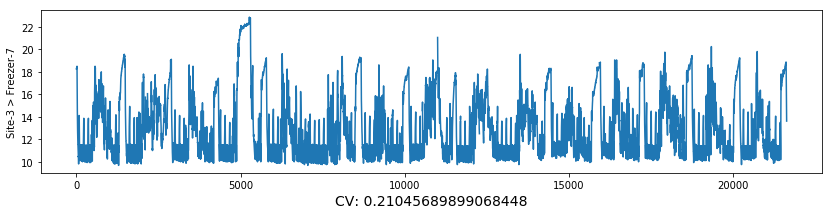

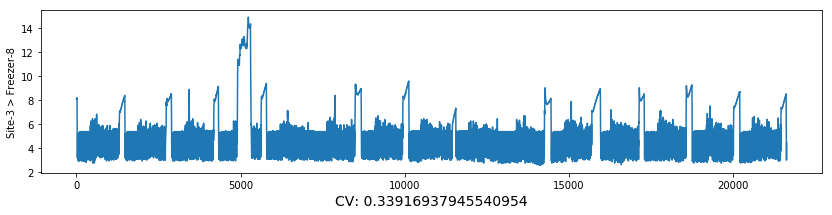

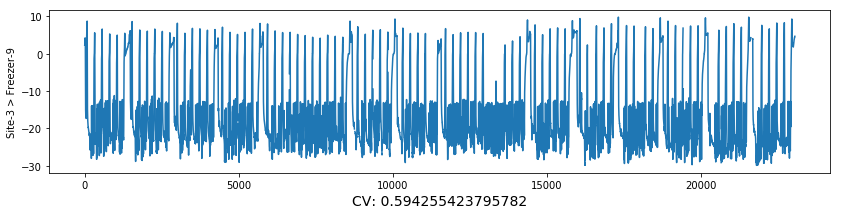

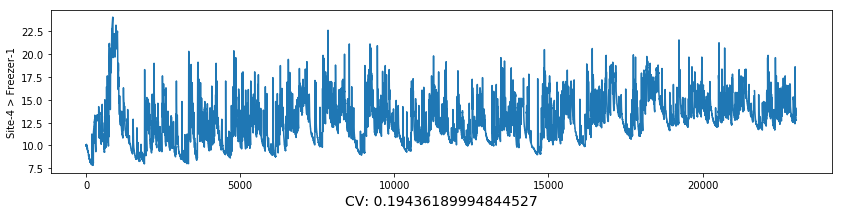

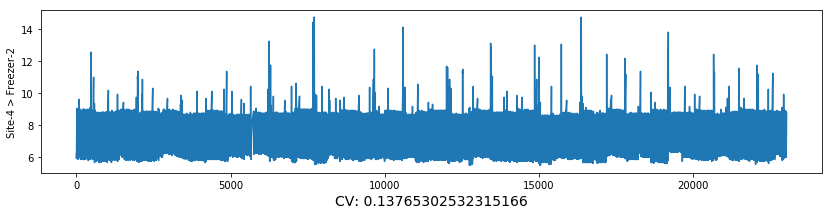

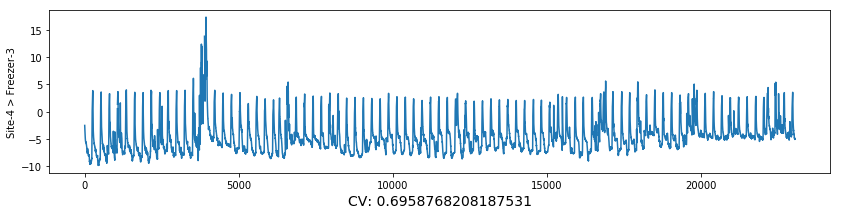

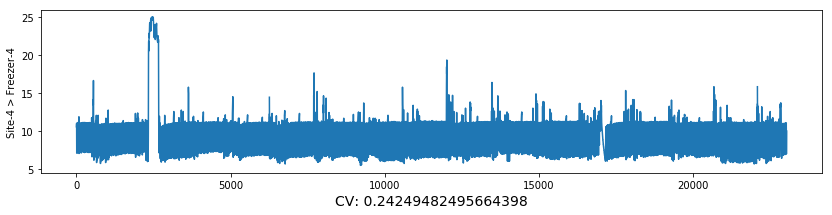

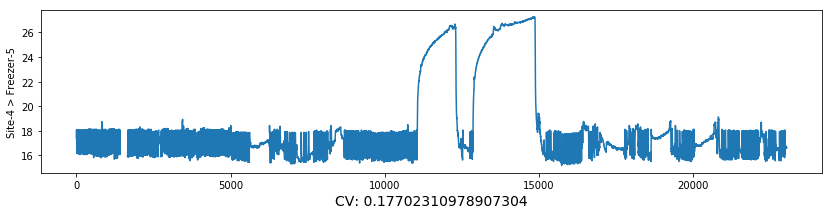

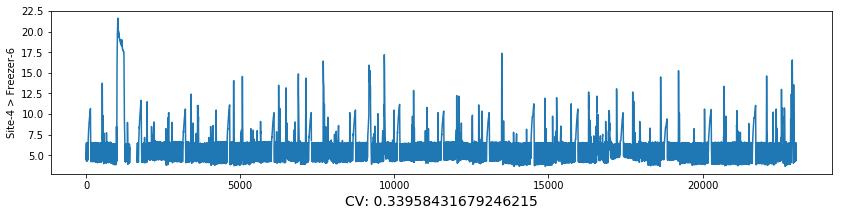

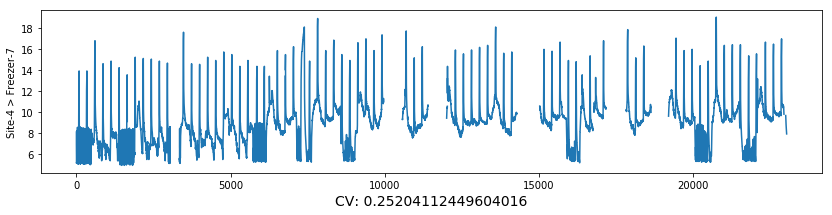

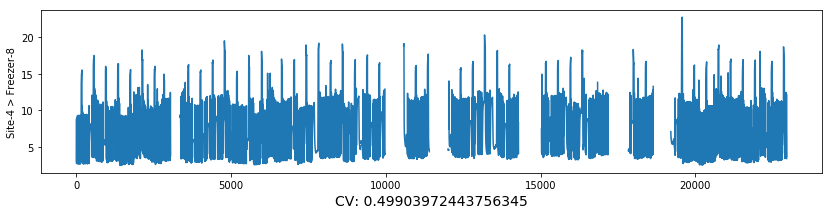

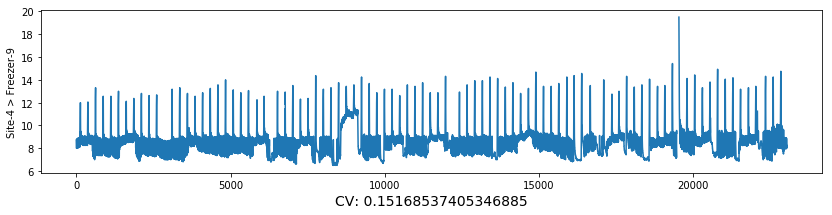

In [38]:
for x in data.columns.difference(['Time']):
    plt.figure(figsize=(14,3))
    plt.ylabel(x)
    plt.xlabel('CV: {0}'.format(np.absolute(data[x].std()/data[x].mean())),fontsize=14)
    plt.plot(data[x])
    plt.show()

#### Based on the EDA done above 

1. The data has cyclic trends 
2. Data has a high CV 
3. Box plots for each feature(freezer shows) presence of outliers
4. Majority of values lie in the lower temp range(which should be the case for a freezer) except for a few freezer where this is not the case.We **might** consider these freezers(as less efficient performers) 

### Conclusions drawn!


- Based on the observations above imputing the values with mean makes less sense as Mean does not counter the presence of outliers & such a case would lead to presence of outliers as well

- Imputing missing values with Median makes sense(considering it can combat the presence of outliers & also high variance in data) but then as we have already seen that the data shows some cyclic distribution for rise & falls of temperature so imputing it with a fixed value will not be that effective

- Conclusively, I decided to impute the missing value using a **`forward fill method`** which basically imputes the missing value from a value just before it in a given distribution
    - Doing so will not break the already existing cyclic trend 
    - Also since we are not imputing with a fixed value so balance of the consistency & the variability would also remain

### Task 1 - Imputing

In [983]:
data = data.apply(lambda x:x.fillna(method = 'ffill'))
data = data.apply(lambda x:x.fillna(method = 'bfill'))

#### After imputation trend analysis


- It can be seen from the trends available that the trends in Temperature distribution has not changed by much after the imputation done(which was desired from the beginning)

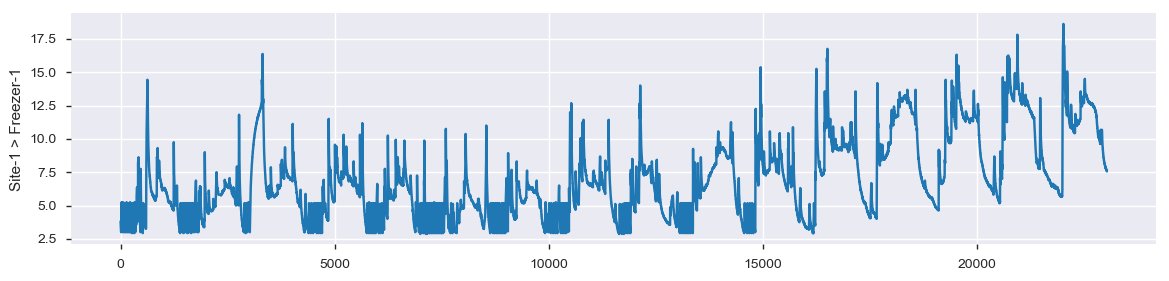

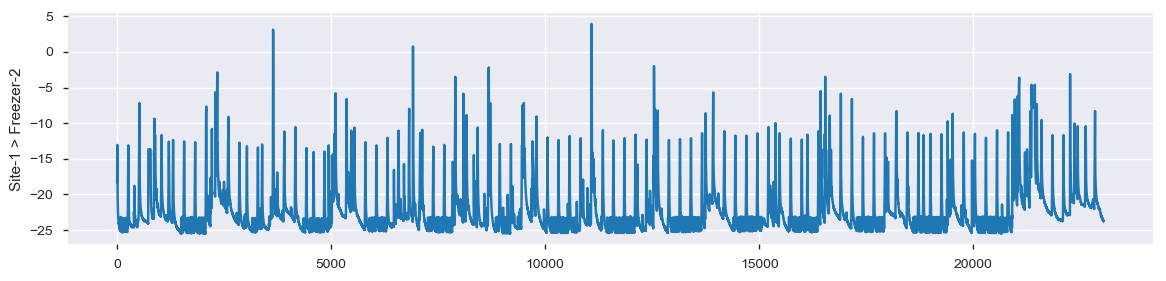

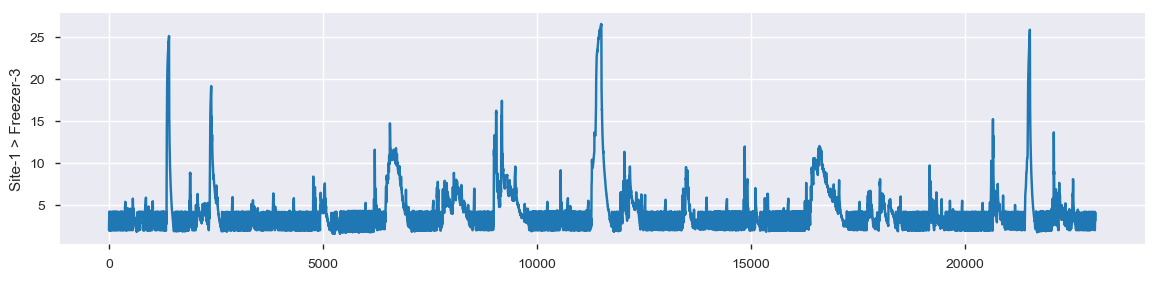

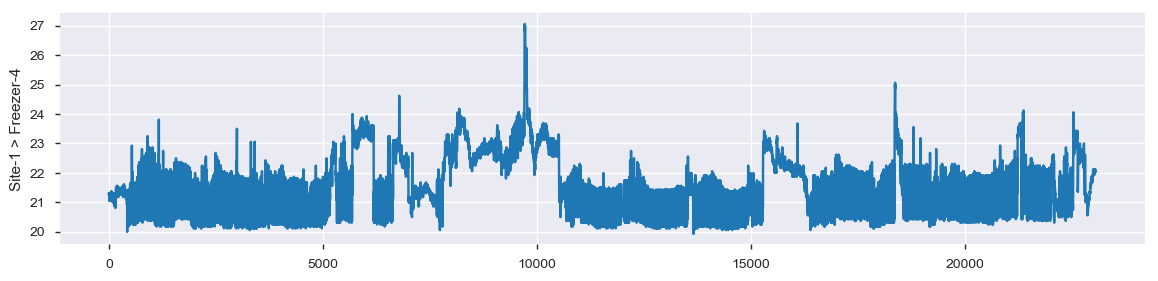

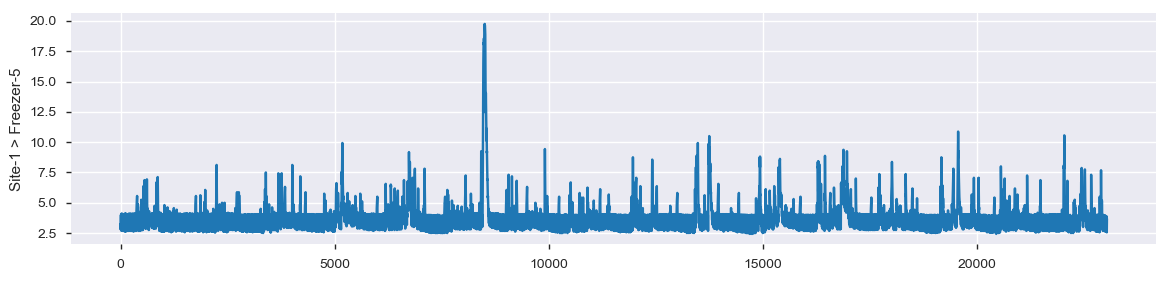

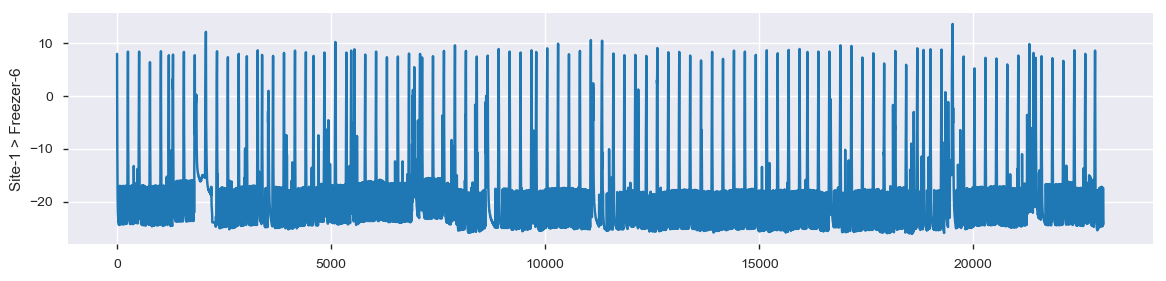

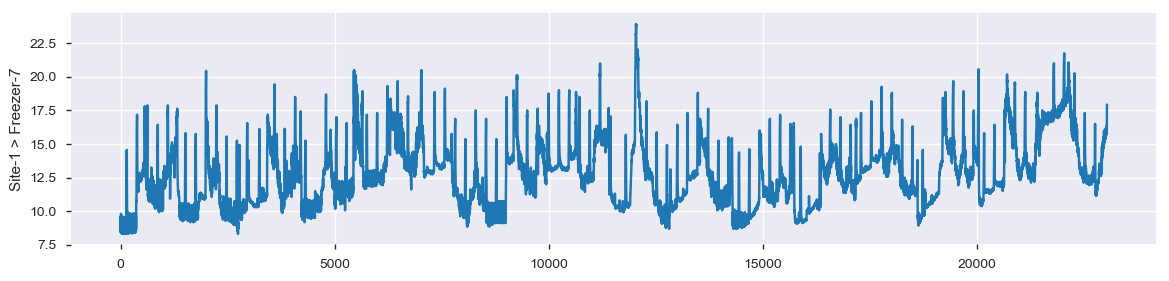

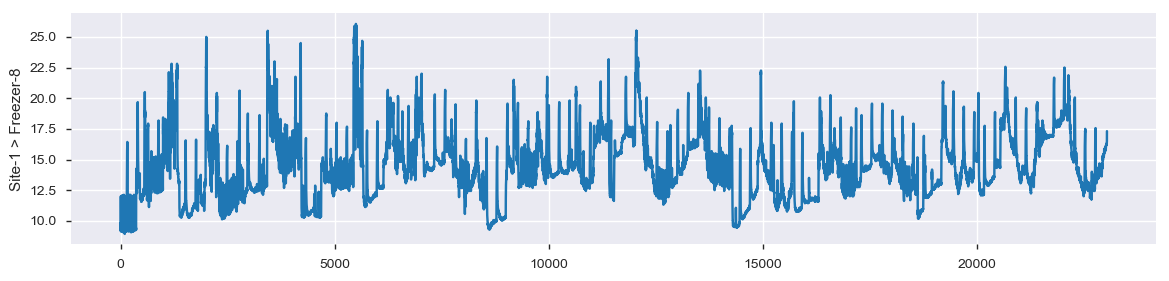

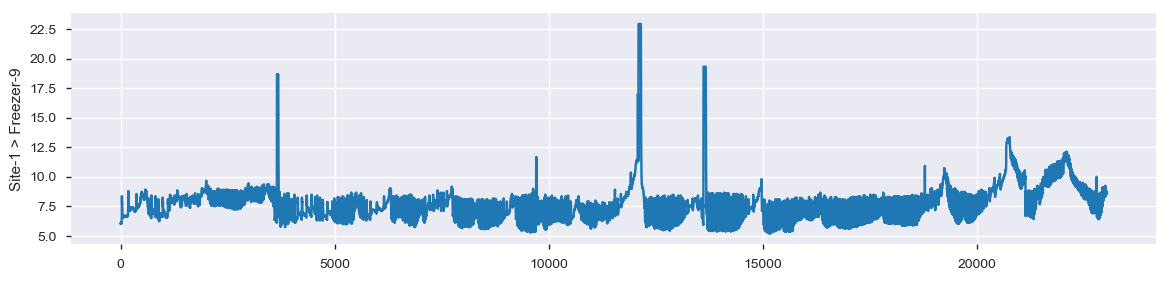

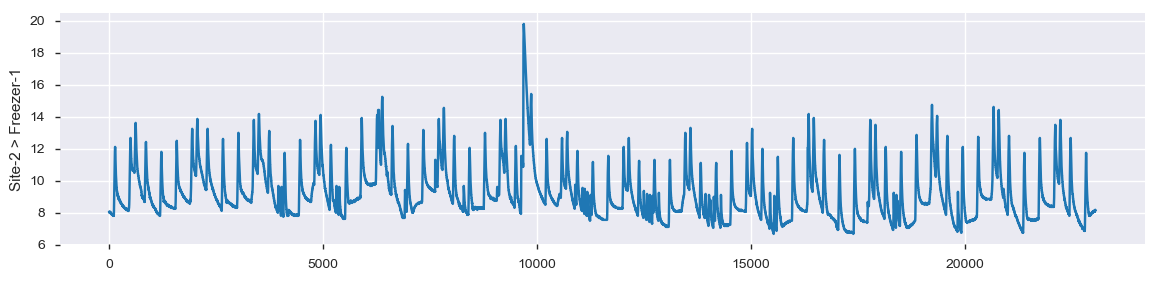

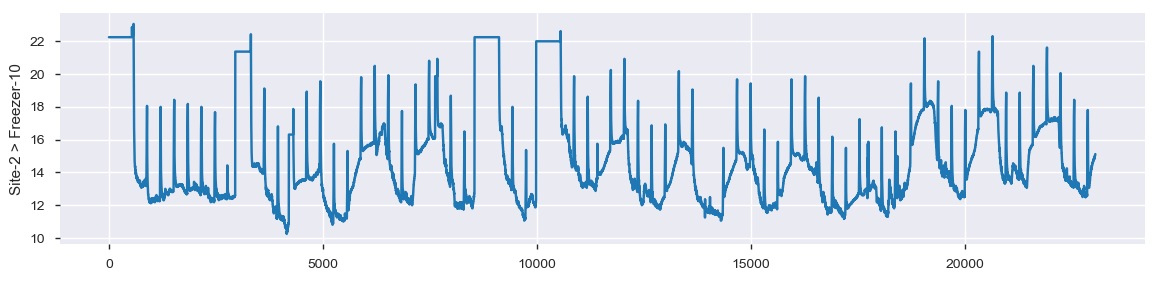

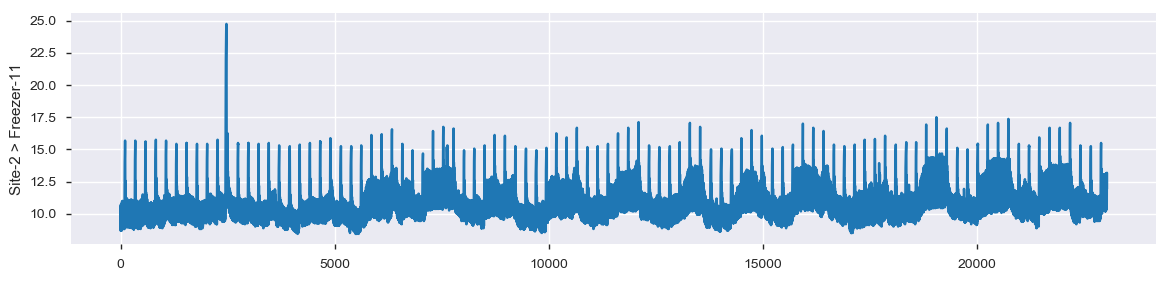

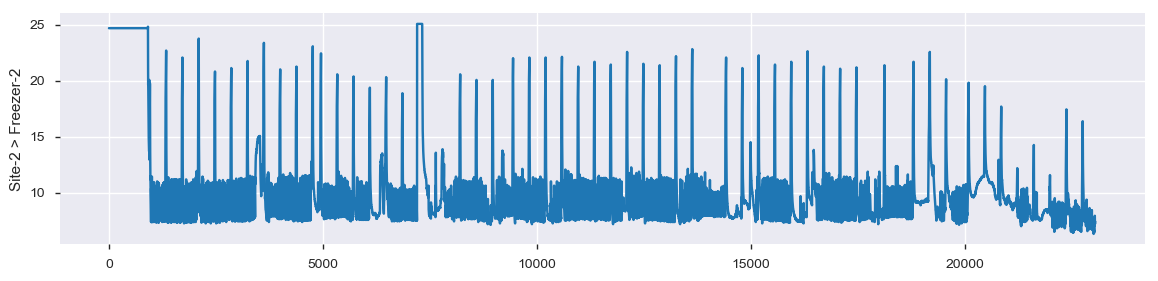

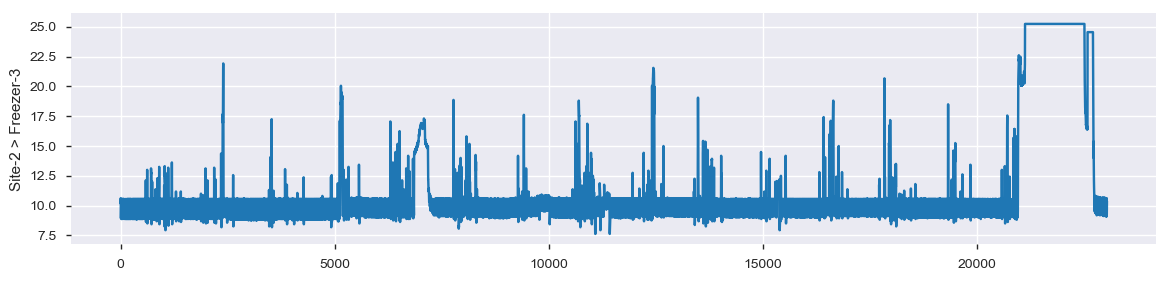

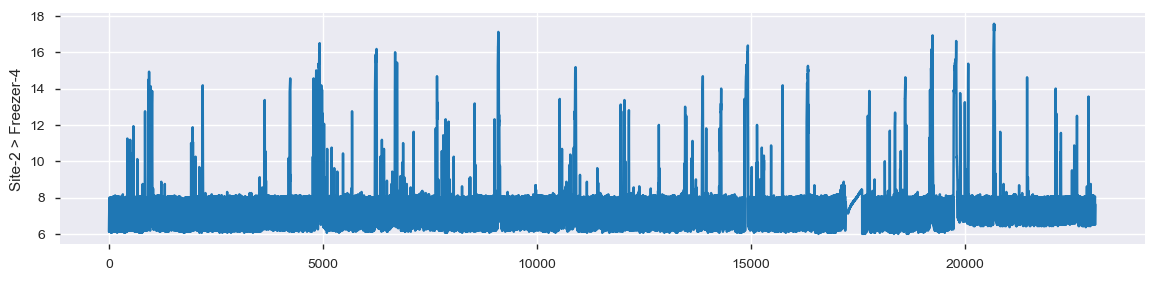

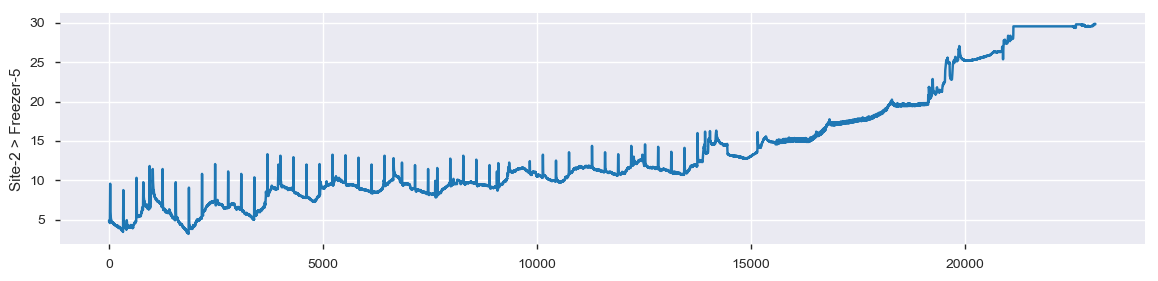

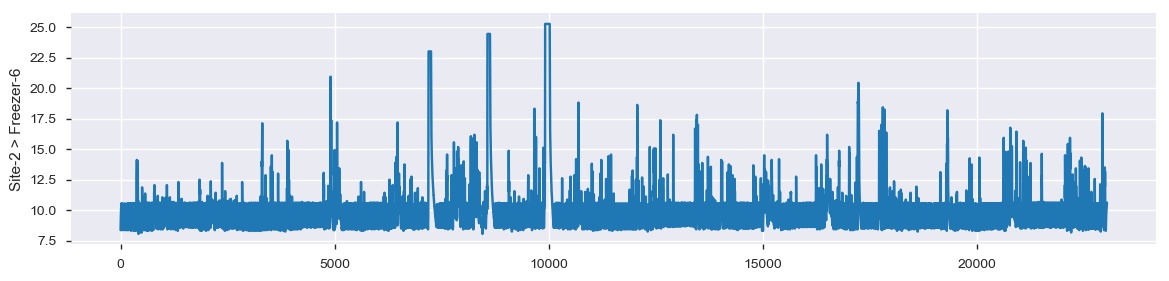

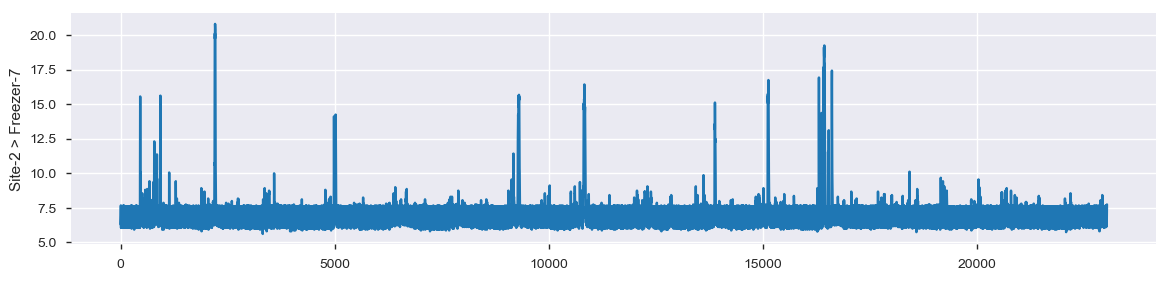

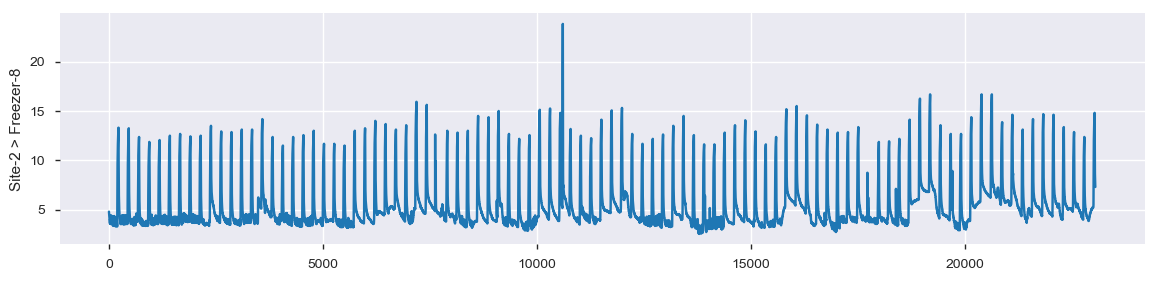

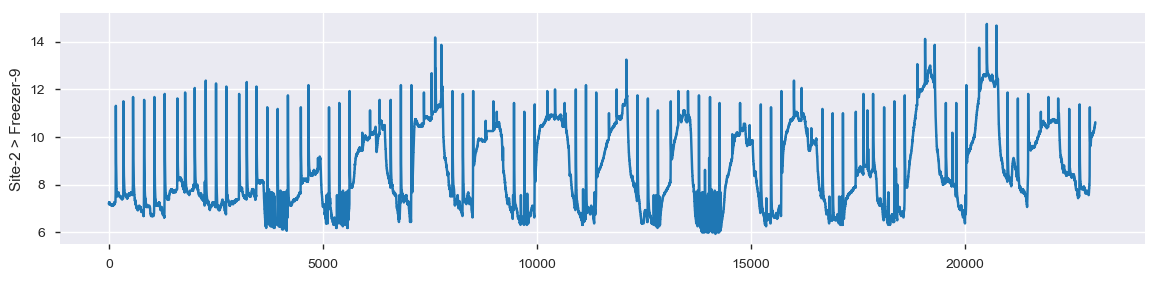

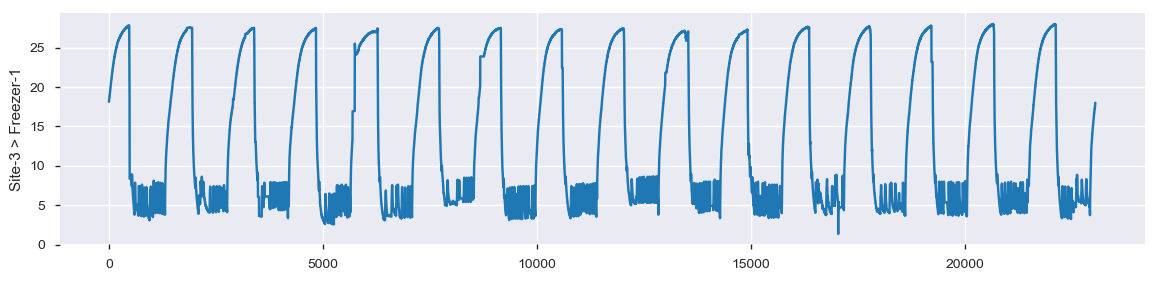

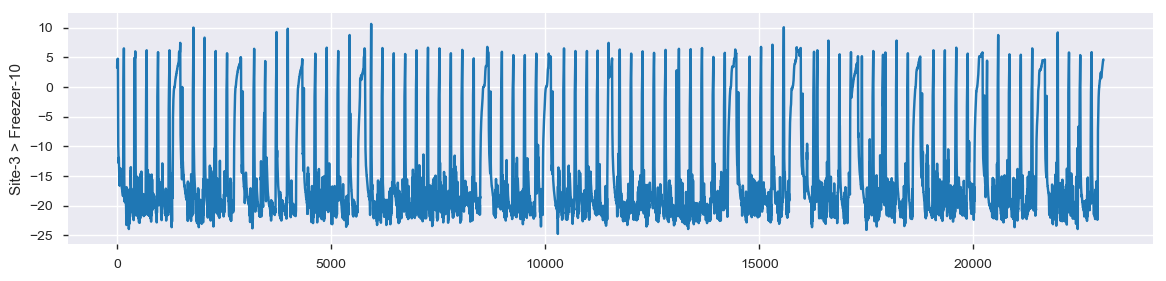

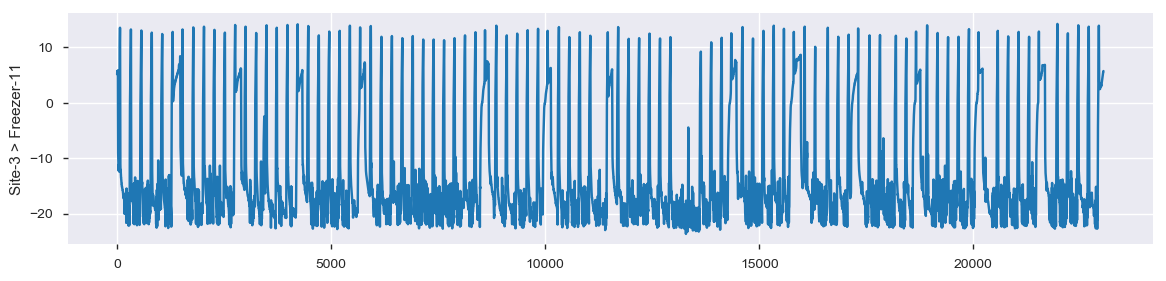

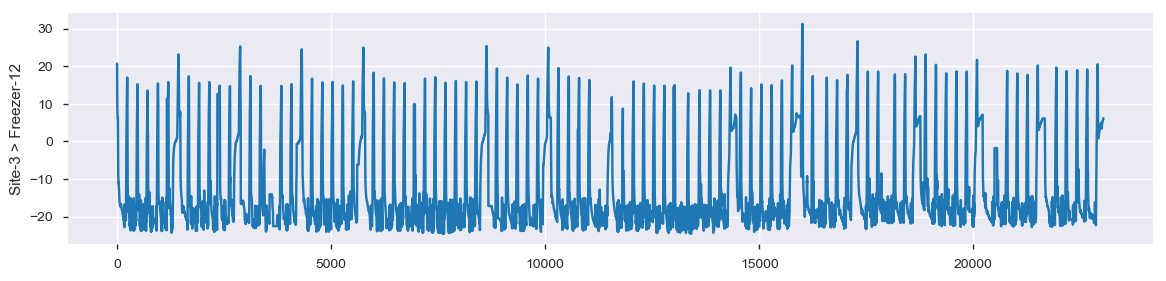

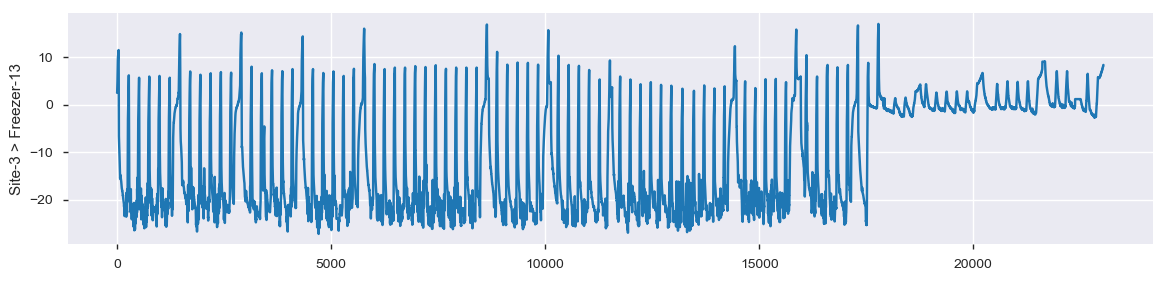

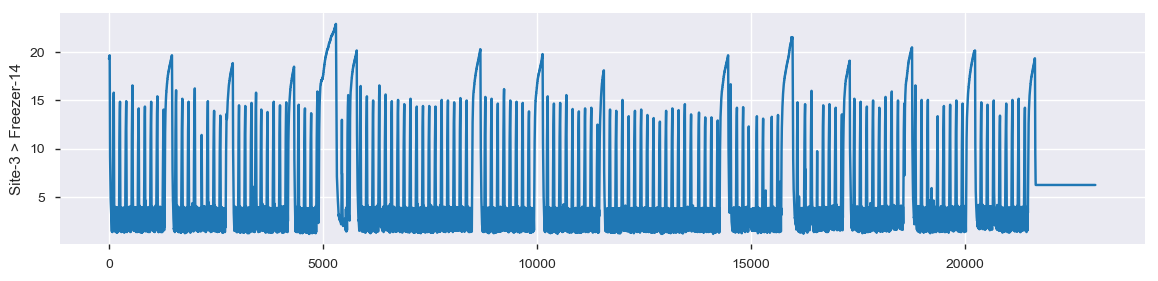

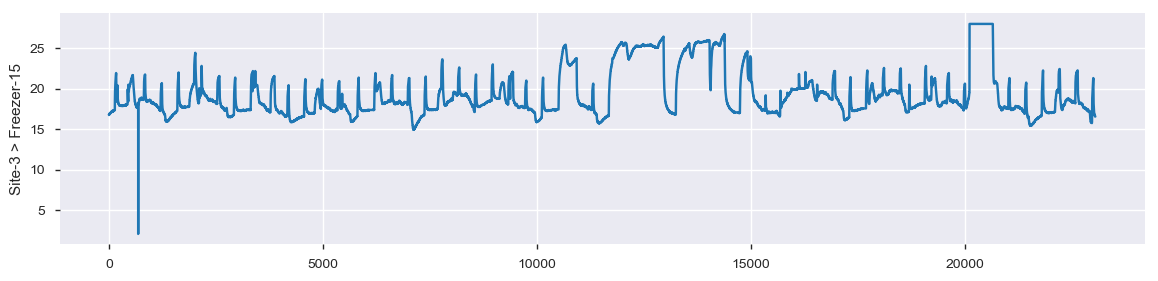

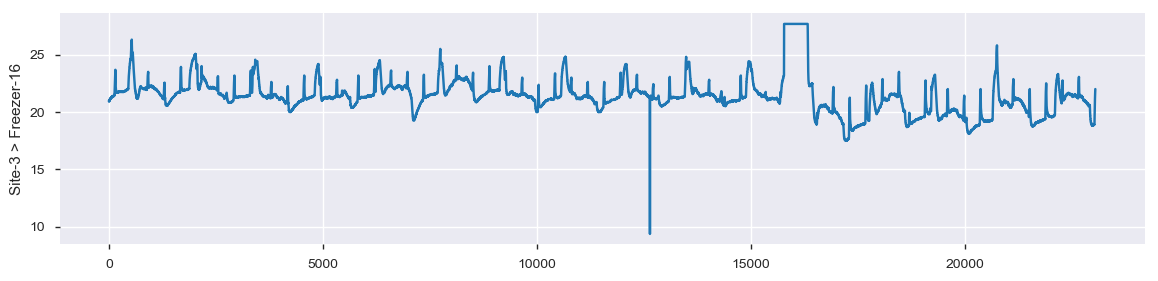

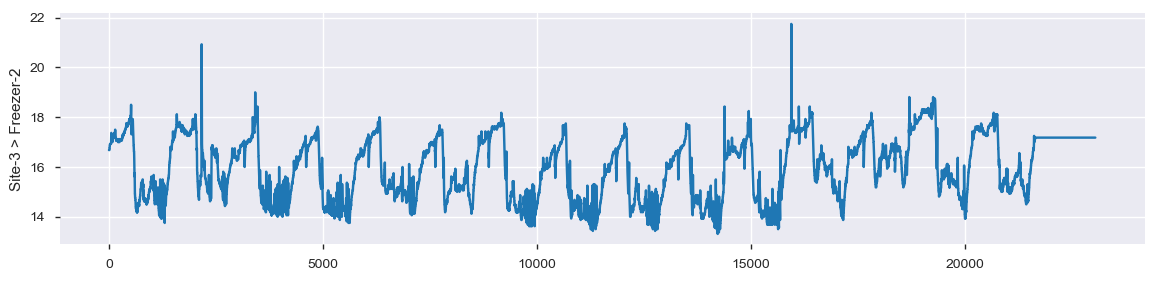

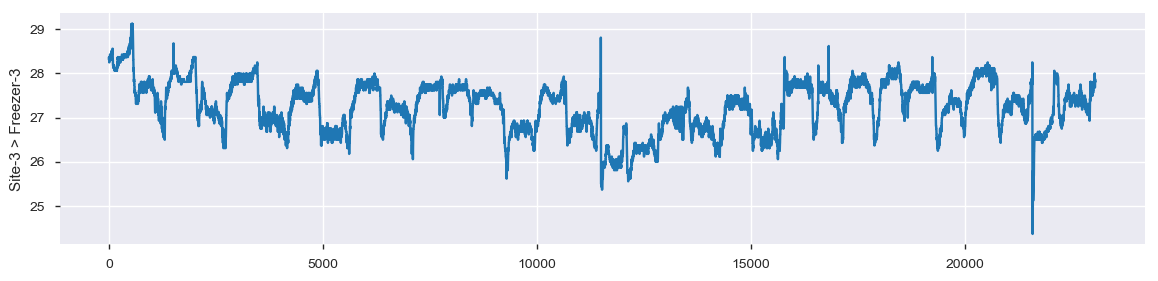

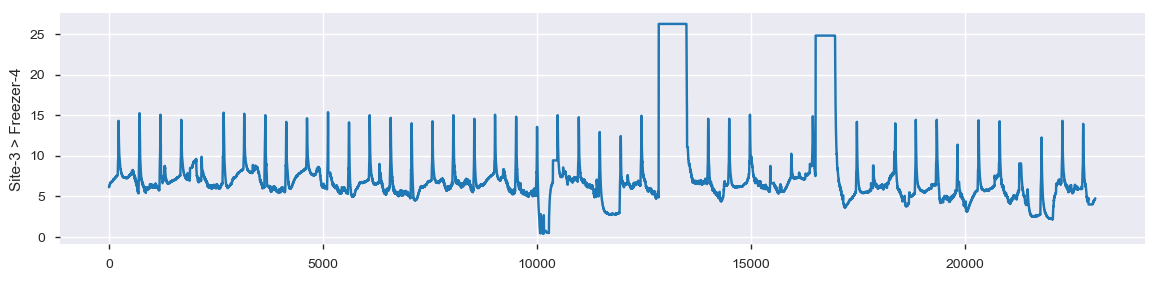

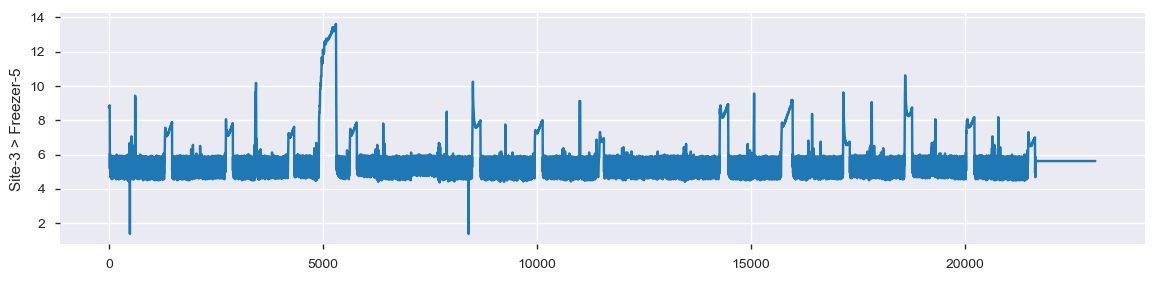

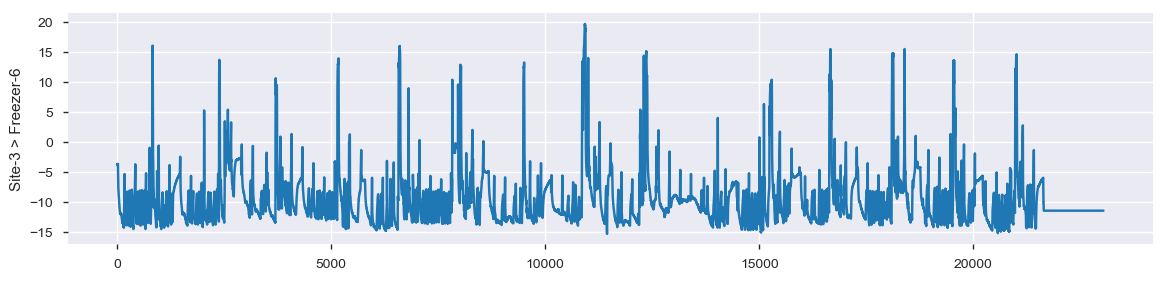

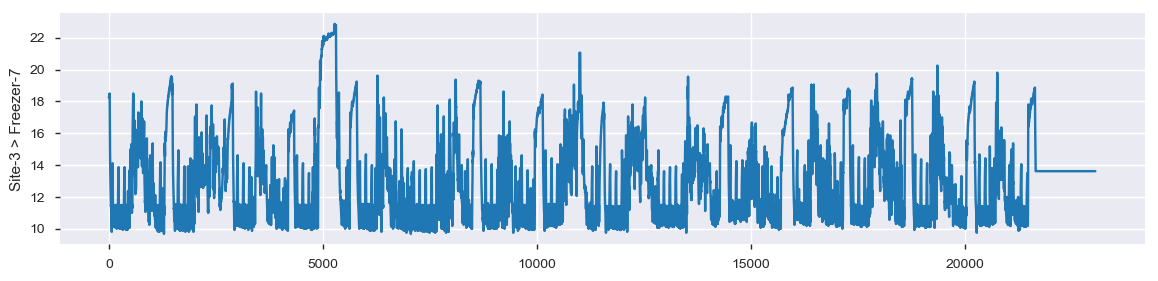

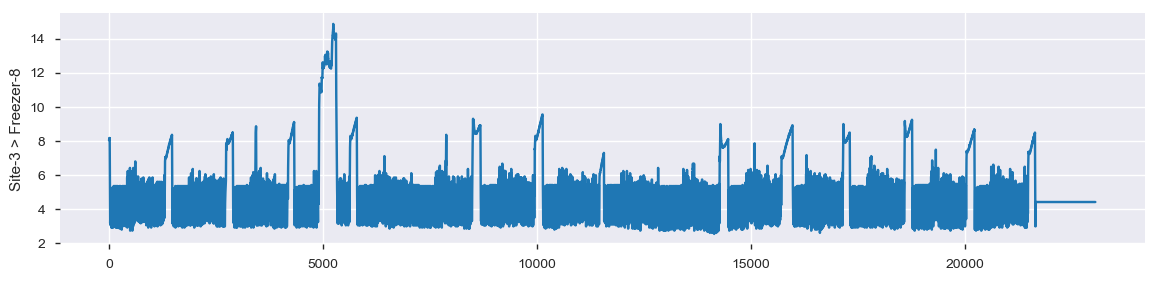

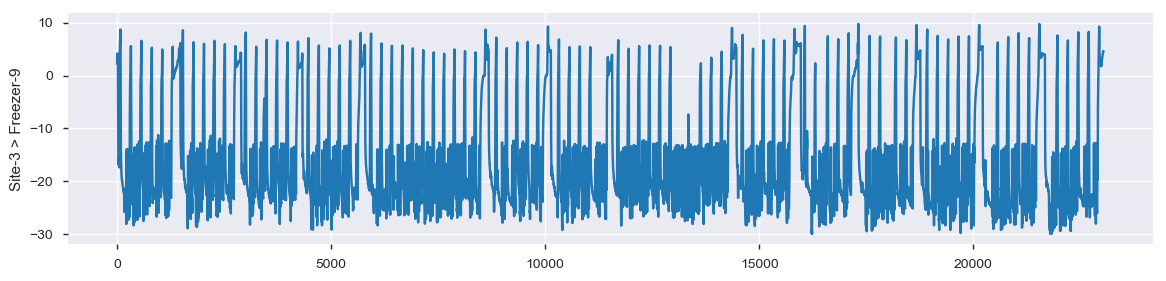

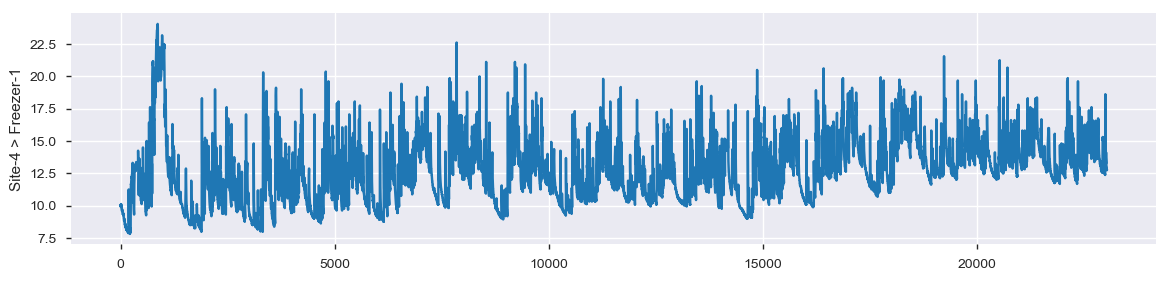

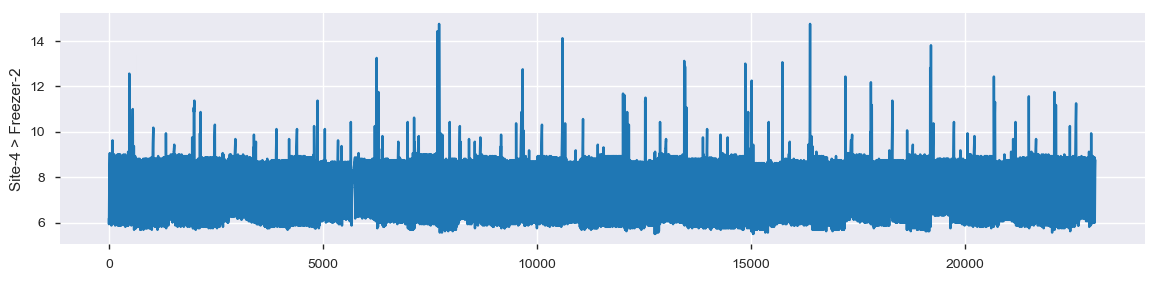

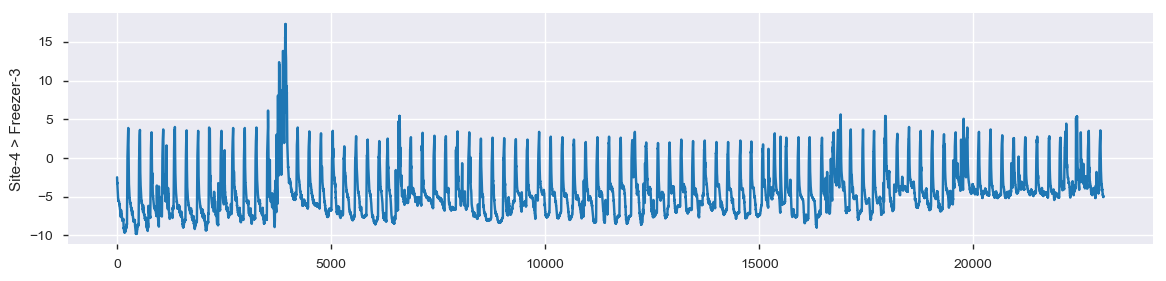

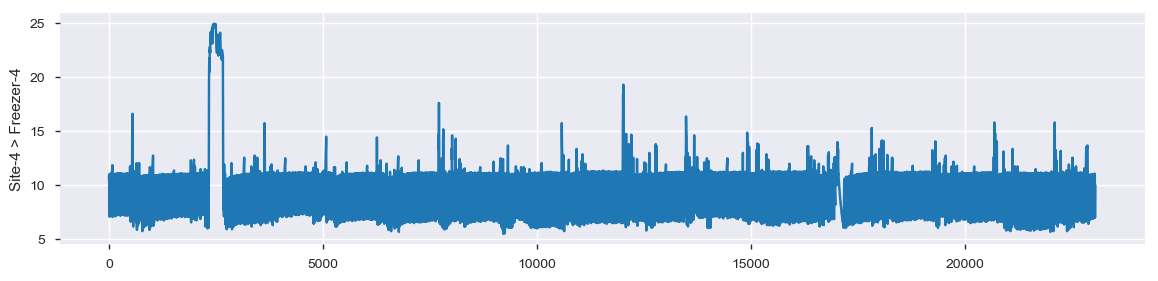

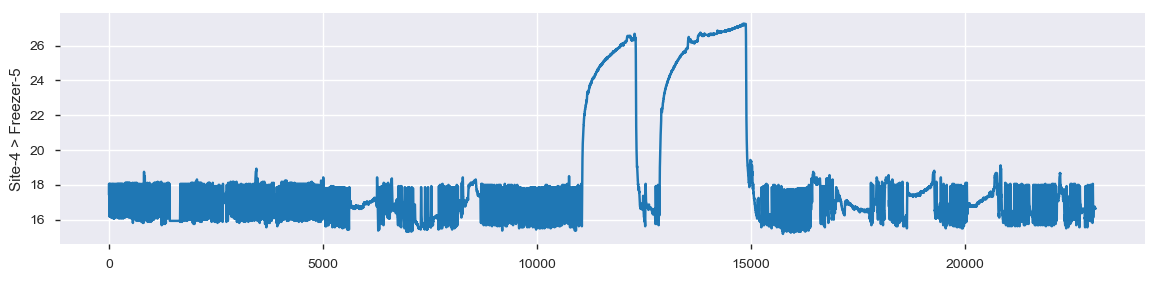

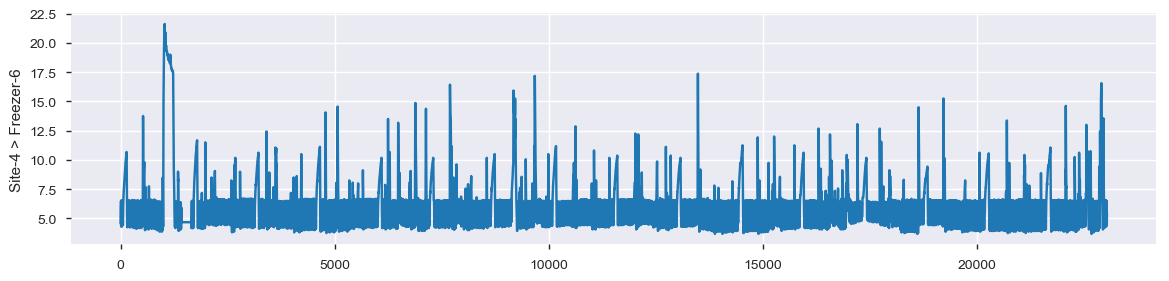

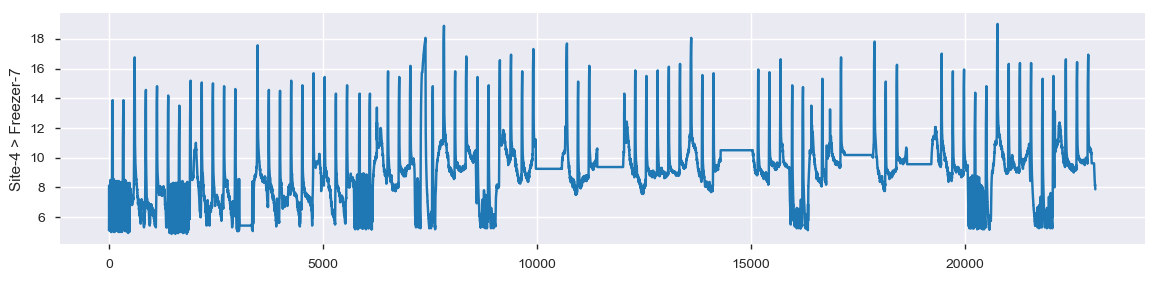

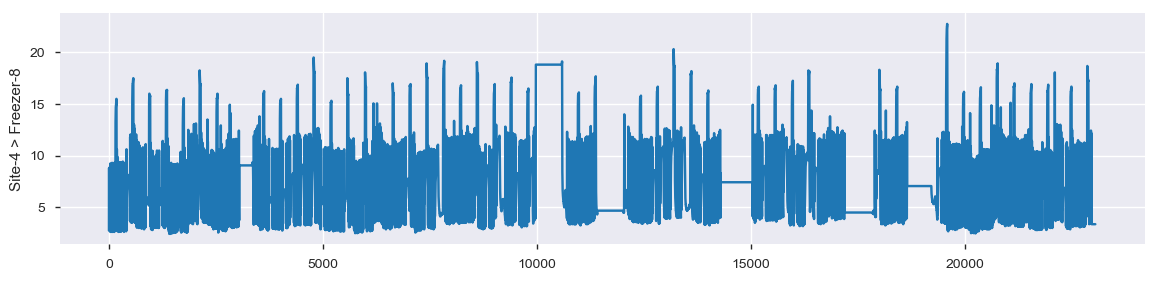

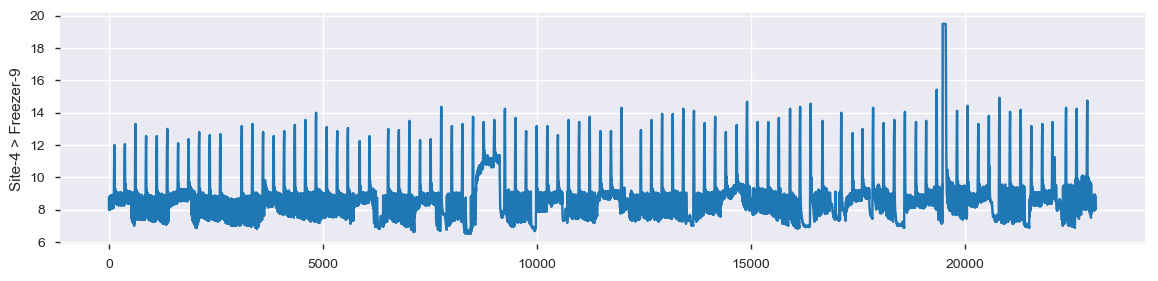

In [984]:
for x in data.columns.difference(['Time']):
    plt.figure(figsize=(14,3))
    plt.ylabel(x)
    #plt.xlabel('CV: {0}'.format(np.absolute(data[x].std()/data[x].mean())),fontsize=14)
    plt.plot(data[x])
    plt.show()

#### No null values present

- After imputtaion, No null values remian!

In [987]:
data.isnull().sum().to_frame().T

Time  Site-1 > Freezer-1  Site-1 > Freezer-2  Site-1 > Freezer-3  \
0     0                   0                   0                   0   

   Site-1 > Freezer-4  Site-1 > Freezer-5  Site-1 > Freezer-6  \
0                   0                   0                   0   

   Site-1 > Freezer-7  Site-1 > Freezer-8  Site-1 > Freezer-9  \
0                   0                   0                   0   

          ...          Site-3 > Freezer-16  Site-4 > Freezer-1  \
0         ...                            0                   0   

   Site-4 > Freezer-2  Site-4 > Freezer-3  Site-4 > Freezer-4  \
0                   0                   0                   0   

   Site-4 > Freezer-5  Site-4 > Freezer-6  Site-4 > Freezer-7  \
0                   0                   0                   0   

   Site-4 > Freezer-8  Site-4 > Freezer-9  
0                   0                   0  

[1 rows x 46 columns]

### Task 2 - Operating Range of the freezers

#### Recreating the Desc Dataframe 

- Desc Dataframe is not required to that extent anymore, so we would be moving ahead from here without much involvement in Desc

In [988]:
desc = data.describe().T


### CV -  coefficient of variation
desc['|CV|']  = np.absolute(desc['std']/desc['mean'])

desc = desc.sort_values(by = '|CV|',ascending= False)

### Analysing Null share
nulls = data.isnull().sum().sort_values(ascending = False).to_frame()*100/len(data)
desc  = desc.merge(nulls,left_index=True,right_index=True)

### Renaming columns
desc.rename(columns={0:'%zeroes'},inplace=True)


### skew/kurtosis
desc_var = pd.DataFrame(list(zip(data.columns,data.skew(),data.kurtosis())),columns= ['cols','skew','kurtosis'])
desc_var.set_index('cols',inplace=True)


### Merging
desc  = desc.merge(desc_var,left_index=True,right_index=True)

desc.head(2)

count       mean        std    min    25%    50%   75%  \
Site-3 > Freezer-13  23040.0 -11.707832  11.050764 -27.18 -21.62 -16.93 -0.56   
Site-3 > Freezer-14  23040.0   5.987831   5.430238   1.18   2.25   3.37  7.62   

                       max      |CV|  %zeroes      skew  kurtosis  
Site-3 > Freezer-13  17.00  0.943878        0  1.365671  0.573962  
Site-3 > Freezer-14  22.93  0.906879        0  1.346420  1.048839

#### Operating range

- The operating range for each of the freezer is taken to be the difference of Max & Min temperatures the freezer operates at

- `Oper_range = Max_Temp - Min_Temp`

In [991]:
desc['oper_range'] = desc['max'] - desc['min']
operating_range = desc.oper_range.sort_index().to_frame()

operating_range+

oper_range
Site-1 > Freezer-1        15.75
Site-1 > Freezer-2        29.49
Site-1 > Freezer-3        24.94
Site-1 > Freezer-4         7.13
Site-1 > Freezer-5        17.32
Site-1 > Freezer-6        39.80
Site-1 > Freezer-7        15.62
Site-1 > Freezer-8        17.13
Site-1 > Freezer-9        17.75
Site-2 > Freezer-1        13.13
Site-2 > Freezer-10       12.81
Site-2 > Freezer-11       16.32
Site-2 > Freezer-2        18.75
Site-2 > Freezer-3        17.63
Site-2 > Freezer-4        11.56
Site-2 > Freezer-5        26.69
Site-2 > Freezer-6        17.19
Site-2 > Freezer-7        15.19
Site-2 > Freezer-8        21.25
Site-2 > Freezer-9         8.82
Site-3 > Freezer-1        26.63
Site-3 > Freezer-10       35.37
Site-3 > Freezer-11       37.87
Site-3 > Freezer-12       55.93
Site-3 > Freezer-13       44.18
Site-3 > Freezer-14       21.75
Site-3 > Freezer-15       25.94
Site-3 > Freezer-16       18.31
Site-3 > Freezer-2         8.44
Site-3 > Freezer-3         4.75
Site-3 > Freezer-4        25.88
Site-3 > Freezer-5        12.25
Site-3 > Freezer-6        35.06
Site-3 > Freezer-7        13.19
Site-3 > Freezer-8        12.31
Site-3 > Freezer-9        39.68
Site-4 > Freezer-1        16.25
Site-4 > Freezer-2         9.25
Site-4 > Freezer-3        27.12
Site-4 > Freezer-4        19.43
Site-4 > Freezer-5        12.07
Site-4 > Freezer-6        17.94
Site-4 > Freezer-7        14.13
Site-4 > Freezer-8        20.32

#### Plotting the operating ranges for each freezer in descending order

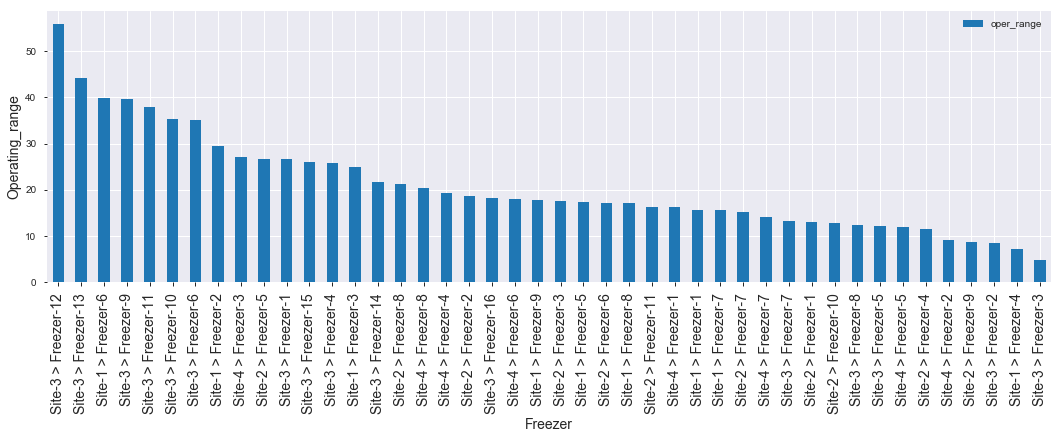

In [1103]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,5

opr = operating_range.sort_values(by = 'oper_range',ascending = False)
opr.plot(kind= 'bar')

plt.xlabel('Freezer',fontsize = 14)

plt.ylabel('Operating_range', fontsize = 14)

plt.xticks(fontsize = 14)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }



### Task 3 - Daily average of door open duration per freezer

- `Idea/Logic`

For each freezer we can calculate the interval in which the freezers temp starts rising(that's when the door would be open) 

- We have created a map as `D` & `I`

`D` : Indicates the temp for a freezer is decreaing. i.e: The door is closed & cooling is happening

`I` : Indicates the temp for a freezer is Increasing. i.e: The door is Open & cooling is not happening

In [43]:
df = pd.DataFrame(index=np.arange(1,23040))

for x in data.columns.difference(['Time']):
    a = pd.DataFrame(np.where(data[x] - data[x].shift(1) <= 0,"D","I"))
    b = data[[x]].merge(a,left_index = True,right_index = True)
    b.rename(columns={0:'state: Site{0} >> Freezer{1} '.format(x.split("-")[1][0],x.split("-")[2])},
             inplace=True)
    
    df = df.merge(b,left_index = True,right_index =True)
    

In [44]:
df

Site-1 > Freezer-1 state: Site1 >> Freezer1   Site-1 > Freezer-2  \
1                    3.68                         D              -17.56   
2                    3.62                         D              -16.87   
3                    3.56                         D              -16.18   
4                    3.43                         D              -15.43   
5                    3.43                         D              -14.68   
6                    3.37                         D              -13.87   
7                    3.25                         D              -13.06   
8                    3.25                         D              -13.87   
9                    3.18                         D              -15.93   
10                   3.12                         D              -17.75   
11                   3.12                         D              -19.00   
12                   3.00                         D              -19.87   
13                   3.00                         D              -20.43   
14                   3.31                         I              -20.81   
15                   3.62                         I              -21.18   
16                   3.87                         I              -21.43   
17                   4.12                         I              -21.75   
18                   4.37                         I              -22.00   
19                   4.56                         I              -22.18   
20                   4.75                         I              -22.43   
21                   4.87                         I              -22.56   
22                   4.93                         I              -22.75   
23                   5.12                         I              -22.87   
24                   5.25                         I              -23.00   
25                   4.93                         D              -23.12   
26                   4.68                         D              -23.25   
27                   4.56                         D              -23.37   
28                   4.18                         D              -23.43   
29                   4.06                         D              -23.56   
30                   3.93                         D              -23.62   
...                   ...                       ...                 ...   
23010                7.81                         D              -23.37   
23011                7.75                         D              -23.31   
23012                7.81                         I              -23.43   
23013                7.75                         D              -23.37   
23014                7.75                         D              -23.37   
23015                7.75                         D              -23.50   
23016                7.75                         D              -23.50   
23017                7.75                         D              -23.50   
23018                7.75                         D              -23.43   
23019                7.75                         D              -23.50   
23020                7.75                         D              -23.50   
23021                7.75                         D              -23.56   
23022                7.75                         D              -23.56   
23023                7.68                         D              -23.56   
23024                7.68                         D              -23.62   
23025                7.68                         D              -23.62   
23026                7.68                         D              -23.62   
23027                7.68                         D              -23.56   
23028                7.68                         D              -23.62   
23029                7.62                         D              -23.56   
23030                7.62                         D              -23.62   
23031                7.62       

- Seperating map of `D` & `I` from original Dataset

- **`df1 :`** Dataset containing maps of `D` & `I` for each freezer for each time interval
- df1 does not contain the original temp distribution but just the map!

In [45]:
df1 = df[df.columns[df.columns.str.contains('state')]]
df1.head()

state: Site1 >> Freezer1  state: Site1 >> Freezer2   \
1                         D                         I   
2                         D                         I   
3                         D                         I   
4                         D                         I   
5                         D                         I   

  state: Site1 >> Freezer3  state: Site1 >> Freezer4   \
1                         I                         D   
2                         I                         I   
3                         I                         D   
4                         I                         D   
5                         I                         D   

  state: Site1 >> Freezer5  state: Site1 >> Freezer6   \
1                         D                         D   
2                         D                         D   
3                         I                         D   
4                         I                         D   
5                         I                         D   

  state: Site1 >> Freezer7  state: Site1 >> Freezer8   \
1                         D                         D   
2                         I                         D   
3                         D                         D   
4                         D                         I   
5                         I                         I   

  state: Site1 >> Freezer9  state: Site2 >> Freezer1   \
1                         I                         D   
2                         D                         D   
3                         D                         D   
4                         I                         D   
5                         D                         D   

             ...            state: Site3 >> Freezer9   \
1            ...                                    I   
2            ...                                    I   
3            ...                                    I   
4            ...                                    I   
5            ...                                    I   

  state: Site4 >> Freezer1  state: Site4 >> Freezer2   \
1                         D                         D   
2                         I                         I   
3                         D                         I   
4                         D                         I   
5                         D                         I   

  state: Site4 >> Freezer3  state: Site4 >> Freezer4   \
1                         D                         I   
2                         D                         I   
3                         D                         I   
4                         D                         I   
5                         I                         D   

  state: Site4 >> Freezer5  state: Site4 >> Freezer6   \
1                         I                         I   
2                         I                         I   
3                         I                         I   
4                         D                         I   
5                         D                         I   

  state: Site4 >> Freezer7  state: Site4 >> Freezer8   \
1                         D                         I   
2                         I                         I   
3                         I                         I   
4                         I                         D   
5                         D                         D   

  state: Site4 >> Freezer9   
1                         D  
2                         D  
3                         D  
4                         I  
5                         I  

[5 rows x 45 columns]

- **`df_f  :`**   Merging `Time` with the mapper of `D` & `I` created 
- Keeping Time(of original ditribution) as Index

In [46]:
df_f = data.Time[1:].to_frame().merge(df1,left_index = True,right_index = True)
df_f.head()

Time state: Site1 >> Freezer1  state: Site1 >> Freezer2   \
1  2019-05-07 00:01:00                         D                         I   
2  2019-05-07 00:02:00                         D                         I   
3  2019-05-07 00:03:00                         D                         I   
4  2019-05-07 00:04:00                         D                         I   
5  2019-05-07 00:05:00                         D                         I   

  state: Site1 >> Freezer3  state: Site1 >> Freezer4   \
1                         I                         D   
2                         I                         I   
3                         I                         D   
4                         I                         D   
5                         I                         D   

  state: Site1 >> Freezer5  state: Site1 >> Freezer6   \
1                         D                         D   
2                         D                         D   
3                         I                         D   
4                         I                         D   
5                         I                         D   

  state: Site1 >> Freezer7  state: Site1 >> Freezer8   \
1                         D                         D   
2                         I                         D   
3                         D                         D   
4                         D                         I   
5                         I                         I   

  state: Site1 >> Freezer9             ...             \
1                         I            ...              
2                         D            ...              
3                         D            ...              
4                         I            ...              
5                         D            ...              

  state: Site3 >> Freezer9  state: Site4 >> Freezer1   \
1                         I                         D   
2                         I                         I   
3                         I                         D   
4                         I                         D   
5                         I                         D   

  state: Site4 >> Freezer2  state: Site4 >> Freezer3   \
1                         D                         D   
2                         I                         D   
3                         I                         D   
4                         I                         D   
5                         I                         I   

  state: Site4 >> Freezer4  state: Site4 >> Freezer5   \
1                         I                         I   
2                         I                         I   
3                         I                         I   
4                         I                         D   
5                         D                         D   

  state: Site4 >> Freezer6  state: Site4 >> Freezer7   \
1                         I                         D   
2                         I                         I   
3                         I                         I   
4                         I                         I   
5                         I                         D   

  state: Site4 >> Freezer8  state: Site4 >> Freezer9   
1                         I                         D  
2                         I                         D  
3                         I                         D  
4                         D                         I  
5                         D                         I  

[5 rows x 46 columns]

- Converting **`Time`** from a `string` object to a `Datetime` object to perform day on day analysis 

In [47]:
df_f.Time = pd.to_datetime(df_f.Time)

In [48]:
df_f.head(2)

Time state: Site1 >> Freezer1  state: Site1 >> Freezer2   \
1 2019-05-07 00:01:00                         D                         I   
2 2019-05-07 00:02:00                         D                         I   

  state: Site1 >> Freezer3  state: Site1 >> Freezer4   \
1                         I                         D   
2                         I                         I   

  state: Site1 >> Freezer5  state: Site1 >> Freezer6   \
1                         D                         D   
2                         D                         D   

  state: Site1 >> Freezer7  state: Site1 >> Freezer8   \
1                         D                         D   
2                         I                         D   

  state: Site1 >> Freezer9             ...             \
1                         I            ...              
2                         D            ...              

  state: Site3 >> Freezer9  state: Site4 >> Freezer1   \
1                         I                         D   
2                         I                         I   

  state: Site4 >> Freezer2  state: Site4 >> Freezer3   \
1                         D                         D   
2                         I                         D   

  state: Site4 >> Freezer4  state: Site4 >> Freezer5   \
1                         I                         I   
2                         I                         I   

  state: Site4 >> Freezer6  state: Site4 >> Freezer7   \
1                         I                         D   
2                         I                         I   

  state: Site4 >> Freezer8  state: Site4 >> Freezer9   
1                         I                         D  
2                         I                         D  

[2 rows x 46 columns]

- Calculating the **`Avg daywise door open time!`**

`Logic`

- We are trying to find values for temp where temperature is increasing (mapper(state) --> I)
- For the values where temp is increasing we calculated the aggregate count grouped on dates


#### `Each value indicate the time(in mins) for a given day for which the freezer remained open`



In [49]:
mask = df_f.columns.difference(['Time'])

In [51]:
dt = pd.DataFrame(index = pd.date_range('2019-05-07','2019-05-22'))
for x in df_f.columns.difference(['Time']):
    a = df_f.loc[df_f[x]== "I",x].groupby(df_f.Time.dt.date).count()
    dt = dt.merge(a.to_frame(),left_index = True,right_index=True)
    dt

In [52]:
dt

state: Site1 >> Freezer1   state: Site1 >> Freezer2   \
2019-05-07                        342                        413   
2019-05-08                        346                        403   
2019-05-09                        314                        368   
2019-05-10                        224                        366   
2019-05-11                        301                        378   
2019-05-12                        365                        361   
2019-05-13                        363                        323   
2019-05-14                        266                        315   
2019-05-15                        222                        351   
2019-05-16                        273                        348   
2019-05-17                        205                        360   
2019-05-18                        233                        325   
2019-05-19                        205                        417   
2019-05-20                        170                        354   
2019-05-21                        185                        391   
2019-05-22                        179                        279   

            state: Site1 >> Freezer3   state: Site1 >> Freezer4   \
2019-05-07                        650                        664   
2019-05-08                        488                        657   
2019-05-09                        566                        699   
2019-05-10                        573                        640   
2019-05-11                        501                        568   
2019-05-12                        488                        530   
2019-05-13                        527                        593   
2019-05-14                        643                        613   
2019-05-15                        435                        676   
2019-05-16                        570                        723   
2019-05-17                        599                        609   
2019-05-18                        475                        606   
2019-05-19                        461                        611   
2019-05-20                        547                        554   
2019-05-21                        575                        541   
2019-05-22                        502                        448   

            state: Site1 >> Freezer5   state: Site1 >> Freezer6   \
2019-05-07                        771                        413   
2019-05-08                        734                        420   
2019-05-09                        727                        348   
2019-05-10                        655                        374   
2019-05-11                        682                        401   
2019-05-12                        698                        371   
2019-05-13                        701                        398   
2019-05-14                        735                        354   
2019-05-15                        769                        325   
2019-05-16                        732                        407   
2019-05-17                        695                        363   
2019-05-18                        644                        366   
2019-05-19                        665                        350   
2019-05-20                        672                        317   
2019-05-21                        690                        379   
2019-05-22                        675                        328   

            state: Site1 >> Freezer7   state: Site1 >> Freezer8   \
2019-05-07                        603                        552   
2019-05-08                        555                        585   
2019-05-09                        557                        585   
2019-05-10                        571                        555   
2019-05-11                        543                        566   
2019-05-12                        416                        538   
2019-05-13                        542                        548 

#### Plotting a heatmap to showcase which freezer has a `high duration(number of mins)` of time when it remained opened 

Text(69,0.5,'Freezer')

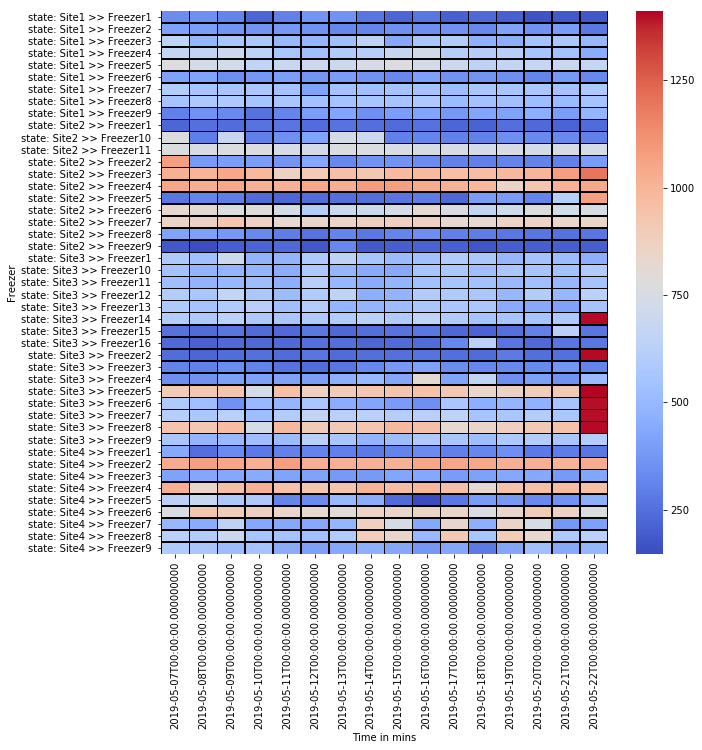

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(dt.T,cmap='coolwarm',linewidths=.5,linecolor='black',label = 'd')

plt.xlabel('Time in mins')

plt.ylabel('Freezer')

In [1024]:
# dt.sum()

# df.loc[df_f['state: Site1 >> Freezer1 '] == "I",'state: Site1 >> Freezer1 '].groupby(by = df_f.Time.dt.date).count()

# df.head(2)

### Task 4 - Classify these freezers based on their operational health

In [54]:
df.tail(2)

Site-1 > Freezer-1 state: Site1 >> Freezer1   Site-1 > Freezer-2  \
23038                7.56                         D              -23.68   
23039                7.56                         D              -23.68   

      state: Site1 >> Freezer2   Site-1 > Freezer-3 state: Site1 >> Freezer3   \
23038                         I                3.62                         D   
23039                         D                3.18                         D   

       Site-1 > Freezer-4 state: Site1 >> Freezer4   Site-1 > Freezer-5  \
23038               22.12                         D                3.50   
23039               22.12                         D                3.68   

      state: Site1 >> Freezer5             ...             Site-4 > Freezer-5  \
23038                         I            ...                          16.62   
23039                         I            ...                          16.62   

      state: Site4 >> Freezer5   Site-4 > Freezer-6 state: Site4 >> Freezer6   \
23038                         D                5.18                         I   
23039                         D                5.50                         I   

       Site-4 > Freezer-7 state: Site4 >> Freezer7   Site-4 > Freezer-8  \
23038                7.93                         D                 NaN   
23039                7.87                         D                 NaN   

      state: Site4 >> Freezer8   Site-4 > Freezer-9 state: Site4 >> Freezer9   
23038                         I                8.00                         D  
23039                         I                8.25                         I  

[2 rows x 90 columns]

#### Creating a map for each point of inflection( when a decreasing temp starrts increasing or an Increasing temp starts decreasing

- Here `D1` indicates : Temp is decreasing & this is the 1st state 
- Similarly `I2` indicates : Temp is Increasing & this is the 2st state and so on & so forth

In [55]:
dz = pd.DataFrame(index= np.arange(1,23040))
df_c = df.copy()
for y in df1.columns:
    a = df[y].ne(df[y].shift()).cumsum()
    a = df1[y] + a.apply(lambda x:str(x))
    df_c[y] = a

In [56]:
df_c

Site-1 > Freezer-1 state: Site1 >> Freezer1   Site-1 > Freezer-2  \
1                    3.68                        D1              -17.56   
2                    3.62                        D1              -16.87   
3                    3.56                        D1              -16.18   
4                    3.43                        D1              -15.43   
5                    3.43                        D1              -14.68   
6                    3.37                        D1              -13.87   
7                    3.25                        D1              -13.06   
8                    3.25                        D1              -13.87   
9                    3.18                        D1              -15.93   
10                   3.12                        D1              -17.75   
11                   3.12                        D1              -19.00   
12                   3.00                        D1              -19.87   
13                   3.00                        D1              -20.43   
14                   3.31                        I2              -20.81   
15                   3.62                        I2              -21.18   
16                   3.87                        I2              -21.43   
17                   4.12                        I2              -21.75   
18                   4.37                        I2              -22.00   
19                   4.56                        I2              -22.18   
20                   4.75                        I2              -22.43   
21                   4.87                        I2              -22.56   
22                   4.93                        I2              -22.75   
23                   5.12                        I2              -22.87   
24                   5.25                        I2              -23.00   
25                   4.93                        D3              -23.12   
26                   4.68                        D3              -23.25   
27                   4.56                        D3              -23.37   
28                   4.18                        D3              -23.43   
29                   4.06                        D3              -23.56   
30                   3.93                        D3              -23.62   
...                   ...                       ...                 ...   
23010                7.81                     D3065              -23.37   
23011                7.75                     D3065              -23.31   
23012                7.81                     I3066              -23.43   
23013                7.75                     D3067              -23.37   
23014                7.75                     D3067              -23.37   
23015                7.75                     D3067              -23.50   
23016                7.75                     D3067              -23.50   
23017                7.75                     D3067              -23.50   
23018                7.75                     D3067              -23.43   
23019                7.75                     D3067              -23.50   
23020                7.75                     D3067              -23.50   
23021                7.75                     D3067              -23.56   
23022                7.75                     D3067              -23.56   
23023                7.68                     D3067              -23.56   
23024                7.68                     D3067              -23.62   
23025                7.68                     D3067              -23.62   
23026                7.68                     D3067              -23.62   
23027                7.68                     D3067              -23.56   
23028                7.68                     D3067              -23.62   
23029                7.62                     D3067              -23.56   
23030                7.62                     D3067              -23.62   
23031                7.62       

####  Calculating for each freezer rate of cooling & rate of warming


- `Rate of cooling` : The drop in temp per minute  
    - We calculted this by first calculating the rate for each interval of temp. falling
    - After calc the rate for each temp falling interval, we averaged all the temp falling inteval rate


- `Rate of Warming` : The rise in temp per minute  
    - We calculted this by first calculating the rate for each interval of temp. rising
    - After calc the rate for each temp rising interval, we averaged all the temp rising inteval rate

In [57]:
#li = []
ds = pd.DataFrame()
for x in np.arange(0,90,2):
    w = df_c.iloc[:,x:x+2]    # Taking pairwise columns 0,1 then 2,3 and so on
    
    e = w.groupby(w.iloc[:,1],sort=True).agg({w.columns[0] : ['max','min','count']}) # grouping on state, 
    # Aggregating on temp. for the given state(ex: D1,I2, etc)
    
    
    e.columns = e.columns.droplevel()
    e['rate'] = ((e['max'] - e['min'])/e['count']) 
    e = e.rate
    e.index = np.where(e.index.str.contains('D'),"D","I")
    f = e.groupby(by = e.index).mean()
    #li.append(f)
    ds = ds.append({'D':f['D'],'I':f["I"]},ignore_index=True)

In [1046]:
ds.index = df1.columns

-  `D: Cooling rate` : indicates rate for/of temp dropping intervals
-  `D: Cooling rate` : for an interval of temp decrease is **`(max_temp - min_temp)/time in minutes`** 

- -------------------

-  `I:  Warming rate` : indicates rate for/of temp rising intervals
-  `I: Warming rate` : for an interval of temp increase is **`(max_temp - min_temp)/time in minutes`**


- `D/I` : indicates the ratio of Cooling rate to Warming rate

##### We desire to have a high value of D/I metric

- A high `D/I` indicate good cooling capacity & also good temp maintance even for door open situations

In [1047]:
ds['D/I'] = ds.D/ds.I

ds.sort_values(by = 'D/I' ,ascending= False)

D         I       D/I
state: Site4 >> Freezer2    0.486190  0.234383  2.074334
state: Site2 >> Freezer4    0.376993  0.187872  2.006651
state: Site3 >> Freezer8    0.285260  0.156102  1.827391
state: Site3 >> Freezer5    0.226259  0.129053  1.753222
state: Site4 >> Freezer4    0.518901  0.306999  1.690236
state: Site2 >> Freezer3    0.249043  0.155011  1.606621
state: Site3 >> Freezer16   0.007430  0.005082  1.462044
state: Site3 >> Freezer3    0.010554  0.007304  1.444920
state: Site2 >> Freezer7    0.283661  0.218128  1.300433
state: Site4 >> Freezer6    0.266475  0.216495  1.230860
state: Site2 >> Freezer10   0.016082  0.013233  1.215285
state: Site3 >> Freezer15   0.008223  0.007796  1.054879
state: Site1 >> Freezer5    0.210257  0.212518  0.989364
state: Site3 >> Freezer4    0.017487  0.017818  0.981382
state: Site2 >> Freezer11   0.533426  0.547726  0.973892
state: Site1 >> Freezer4    0.172130  0.191051  0.900964
state: Site1 >> Freezer8    0.073741  0.081934  0.900008
state: Site1 >> Freezer7    0.061660  0.072264  0.853265
state: Site3 >> Freezer7    0.129394  0.162893  0.794353
state: Site4 >> Freezer3    0.038759  0.049828  0.777847
state: Site2 >> Freezer6    0.145454  0.188366  0.772186
state: Site3 >> Freezer9    0.434638  0.598030  0.726783
state: Site1 >> Freezer3    0.124822  0.172388  0.724076
state: Site4 >> Freezer5    0.058987  0.083300  0.708129
state: Site2 >> Freezer1    0.010466  0.015063  0.694775
state: Site3 >> Freezer10   0.373396  0.565360  0.660457
state: Site3 >> Freezer11   0.312702  0.478466  0.653551
state: Site2 >> Freezer8    0.048406  0.075243  0.643332
state: Site2 >> Freezer5    0.013181  0.020523  0.642247
state: Site3 >> Freezer6    0.086857  0.136006  0.638630
state: Site3 >> Freezer14   0.198174  0.325576  0.608689
state: Site3 >> Freezer12   0.307483  0.514902  0.597169
state: Site3 >> Freezer13   0.161133  0.279700  0.576092
state: Site4 >> Freezer8    0.691284  1.287190  0.537049
state: Site4 >> Freezer7    0.042662  0.079764  0.534855
state: Site4 >> Freezer1    0.100592  0.190406  0.528306
state: Site4 >> Freezer9    0.124282  0.252552  0.492105
state: Site3 >> Freezer2    0.009669  0.021329  0.453309
state: Site1 >> Freezer2    0.074598  0.167097  0.446438
state: Site1 >> Freezer6    0.563283  1.326417  0.424665
state: Site1 >> Freezer9    0.067220  0.165335  0.406571
state: Site3 >> Freezer1    0.014773  0.037732  0.391512
state: Site1 >> Freezer1    0.028537  0.075825  0.376354
state: Site2 >> Freezer2    0.201108  0.581928  0.345589
state: Site2 >> Freezer9    0.012185  0.038953  0.312806

Text(0,0.5,'Avg_Temp_decrease_rate/ \nAvg_Temp_increase_rate')

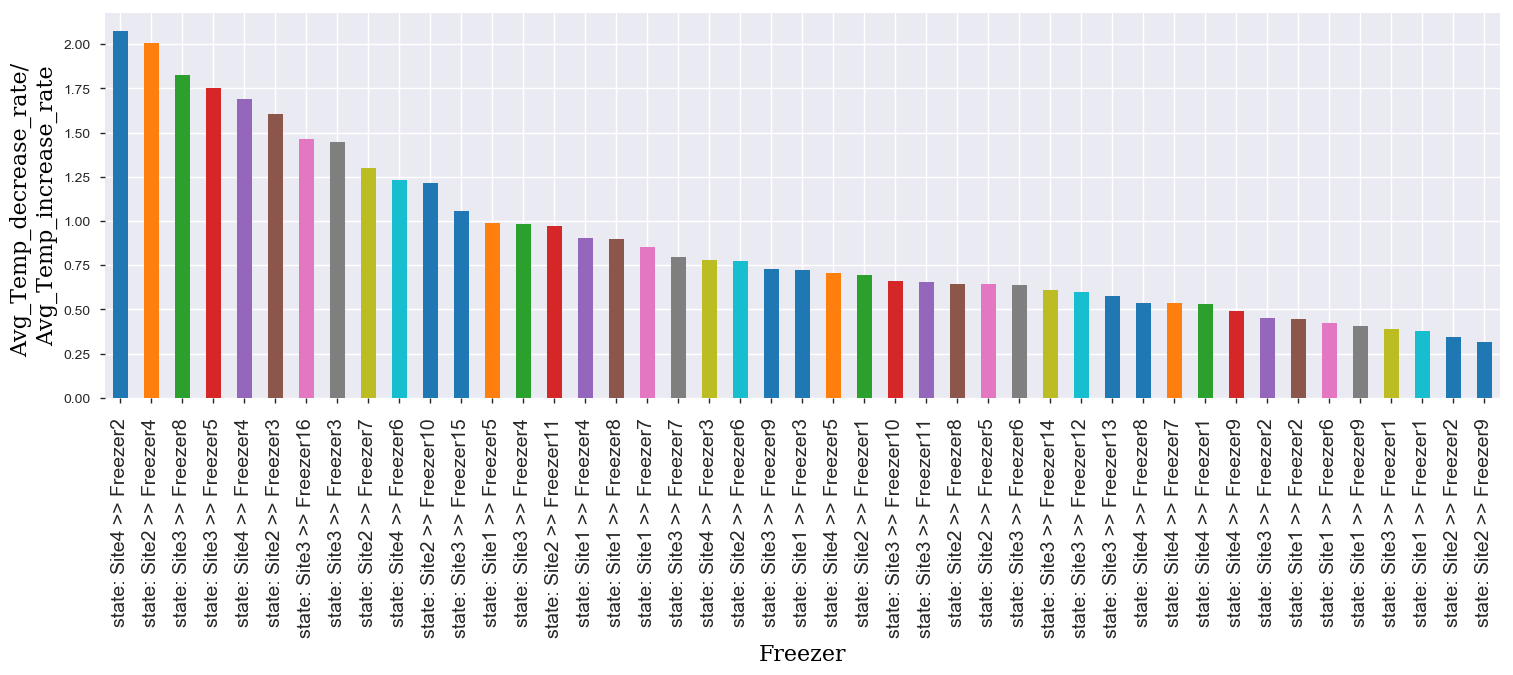

In [1042]:
plt.figure(figsize=(18,5))
plt.xlabel("",fontsize = 10)
h =ds.sort_values(by = 'D/I' ,ascending= False)
h['D/I'].plot(kind= 'bar')

plt.xlabel('Freezer')
gca.yaxis.set_label_coords(1,1)
plt.ylabel('Avg_Temp_decrease_rate/ \nAvg_Temp_increase_rate')


font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

gca = plt.gca()
plt.xticks(fontsize = 14)
gca.set_xlabel(gca.get_xlabel(),fontdict=font)
gca.set_ylabel(gca.get_ylabel(),fontdict=font)